In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =9
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 8.5 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 11 # Overall title
plt.rcParams["axes.labelsize"] = 11 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_April2023_Norm100Anhydrs.xlsx', sheet_name='Cpx-Liq')

myCpxs1=out['Cpxs']
myLiquids1=out['Liqs']
cpx_Glass=out['my_input']
Cpx_Glass=cpx_Glass
notinLEPR= cpx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
OldMask=~newMask
newMask=newMask.fillna(False)

mask_1GPa=cpx_Glass['P_kbar_x']<17
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new=Press_new.fillna(False)

eq_tests=pt.calculate_cpx_liq_eq_tests(liq_comps=myLiquids1, cpx_comps=myCpxs1, P=cpx_Glass['P_kbar_x'], T=cpx_Glass['T_K_x'])

sigma=1.5
Eq_Mask=((eq_tests['Delta_EnFs_Mollo13']<0.05)
        &(eq_tests['Delta_Kd_Put2008']<0.08) 
        &(eq_tests['Cation_Sum_Cpx'].between(3.95, 4.05))
         &(cpx_Glass['N_meas_Cpx']>=5)
         & (cpx_Glass['H2O_Liq']>0)
        
        )

xT=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask]
x=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask]
x_All=cpx_Glass['P_kbar_x'].loc[Press_new]
xT_All=cpx_Glass['T_K_x'].loc[Press_new]

## Masked Cpxs and Glasses
x_T_Mask=cpx_Glass['T_K_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)
x_P_kbar_Mask=cpx_Glass['P_kbar_x'].loc[Press_new&Eq_Mask].reset_index(drop=True)

Cpx_Mask=myCpxs1.loc[Press_new&Eq_Mask].reset_index(drop=True)
Liq_Mask=myLiquids1.loc[Press_new&Eq_Mask].reset_index(drop=True)
cpx_Glass_Mask=cpx_Glass.loc[Press_new&Eq_Mask].reset_index(drop=True)

Using Fe3FeT from input file to calculate Kd Fe-Mg


C:\Users\penny\AppData\Local\Temp\ipykernel_35736\1702828275.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(cpx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(cpx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [4]:
cpx_Glass_Mask['Citation_x'].unique()

array(['Hamada2008_notinLEPR', 'Kraw2013_notinLEPR',
       'Firth2019_notinLEPR', 'Erdmann2016_notinLEPR',
       'Parmon2011_notinLEPR', 'Berndt2005_notinLEPR',
       'Feig2010_notinLEPR', 'Pichavent2007_notinLEPR',
       'Mandler2013_notinLEPR', 'Nandekar2014_notinLEPR',
       'Blatter2013_notinLEPR', 'Blatter2017_notinLEPR',
       'Melekhova2015_notinLEPR', 'Ulmer2018_notinLEPR',
       'Almeev2013_notinLEPR', 'Cadoux2014_notinLEPR',
       'Parat2014_notinLEPR', 'Koepke2018_notinLEPR',
       'Husen2016_notinLEPR', 'Erdman_Koepke2016_notinLEPR',
       'Waters2020_notinLEPR', 'Marxer2022_notinLEPR',
       'Nakatani2022_notinLEPR', 'Blatter2023_notinLEPR'], dtype=object)

In [5]:
## Ones in Wang
InWang=(cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005_notinLEPR')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR'))
                                               
cpx_Glass_Mask_Wang=cpx_Glass_Mask.loc[~InWang].reset_index(drop=True)
Cpx_Mask_Wang=Cpx_Mask.loc[~InWang].reset_index(drop=True)
Liq_Mask_Wang=Liq_Mask.loc[~InWang].reset_index(drop=True)
x_T_Mask_Wang=x_T_Mask.loc[~InWang].reset_index(drop=True)
x_P_kbar_Mask_Wang=x_P_kbar_Mask.loc[~InWang].reset_index(drop=True)                                               

## Ones in Jorg

In [6]:
InJorg=(cpx_Glass_Mask['Citation_x'].str.contains('Kraw2013')
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Berndt2005')   
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Feig2010')   
        
    |
     cpx_Glass_Mask['Citation_x'].str.contains('Nandekar2014_notinLEPR')   

    |
     cpx_Glass_Mask['Citation_x'].str.contains('Melekhova2015_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Ulmer2018')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Almeev2013')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Parat2014_notinLEPR')   
    |        
     cpx_Glass_Mask['Citation_x'].str.contains('Husen2016_notinLEPR')      

       
       )

cpx_Glass_Mask_Jorg=cpx_Glass_Mask.loc[~InJorg].reset_index(drop=True)
Cpx_Mask_Jorg=Cpx_Mask.loc[~InJorg].reset_index(drop=True)
Liq_Mask_Jorg=Liq_Mask.loc[~InJorg].reset_index(drop=True)
x_T_Mask_Jorg=x_T_Mask.loc[~InJorg].reset_index(drop=True)
x_P_kbar_Mask_Jorg=x_P_kbar_Mask.loc[~InJorg].reset_index(drop=True)

In [7]:
Cpx_Mask_All=Cpx_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)
Liq_Mask_All=Liq_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)
cpx_Glass_Mask_All=cpx_Glass_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)

x_T_Mask_All=x_T_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)
x_P_kbar_Mask_All=x_P_kbar_Mask.loc[(~InJorg)&(~InWang)].reset_index(drop=True)

In [8]:
cpx_Glass_Mask_All['Citation_x'].unique()

array(['Hamada2008_notinLEPR', 'Firth2019_notinLEPR',
       'Erdmann2016_notinLEPR', 'Parmon2011_notinLEPR',
       'Pichavent2007_notinLEPR', 'Mandler2013_notinLEPR',
       'Blatter2013_notinLEPR', 'Blatter2017_notinLEPR',
       'Cadoux2014_notinLEPR', 'Koepke2018_notinLEPR',
       'Erdman_Koepke2016_notinLEPR', 'Waters2020_notinLEPR',
       'Marxer2022_notinLEPR', 'Nakatani2022_notinLEPR',
       'Blatter2023_notinLEPR'], dtype=object)

## Calculating P and T

In [9]:
CalcJorg=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_Mask_Jorg, 
                                         equationP="P_Jorgenson2022_Cpx_only",
                                         equationT="T_Jorgenson2022_Cpx_only")

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a P-independent function
Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [10]:
CalcWang=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_Mask_Wang, 
                                         equationP="P_Wang2021_eq1",
                                         equationT="T_Wang2021_eq2",
                                          H2O_Liq=cpx_Glass_Mask_Wang['H2O_Liq'])

Youve selected a P-independent function
Youve selected a T-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


In [11]:
CalcPet=pt.calculate_cpx_only_press_temp(cpx_comps=Cpx_Mask_Jorg, 
                                         equationP="P_Petrelli2020_Cpx_only",
                                         equationT="T_Petrelli2020_Cpx_only")

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a P-independent function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2120: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Youve selected a T-independent function


In [12]:
Calc=pt.calculate_cpx_only_press_all_eqs(cpx_comps=Cpx_Mask_All, H2O_Liq=Liq_Mask_All['H2O_Liq'])
Calc.head()

,P_Wang21_eq1,T_Wang21_eq2,T_Jorgenson22,P_Jorgenson22,T_Petrelli20,T_Petrelli21_H2O,P_Petrelli21_H2O,T_Put_Teq32d_Peq32a,T_Put_Teq32d_Peq32b,P_Petrelli20,P_Put_Teq32d_Peq32a,P_Put_Teq32d_Peq32b,"Jd_from 0=Na, 1=Al",SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,Si_Cpx_cat_6ox,Mg_Cpx_cat_6ox,Fet_Cpx_cat_6ox,Ca_Cpx_cat_6ox,Al_Cpx_cat_6ox,Na_Cpx_cat_6ox,K_Cpx_cat_6ox,Mn_Cpx_cat_6ox,Ti_Cpx_cat_6ox,Cr_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,En_Simple_MgFeCa_Cpx,Fs_Simple_MgFeCa_Cpx,Wo_Simple_MgFeCa_Cpx,Cation_Sum_Cpx,Ca_CaMgFe,Lindley_Fe3_Cpx,Lindley_Fe2_Cpx,Lindley_Fe3_Cpx_prop,CrCaTs,a_cpx_En,Mgno_Cpx,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,FeIII_Wang21,FeII_Wang21,H2O_Liq,T_Put_Teq32d_subsol_Peq32a,T_Put_Teq32d_subsol_Peq32b,P_Put_Teq32d_subsol_Peq32a,P_Put_Teq32d_subsol_Peq32b
0,3.879533,1385.469212,1369.473383,4.933744,1389.623333,1426.798889,6.428284,1489.226941,1480.283541,6.122767,7.664096,6.590308,0,50.3,0.42,5.19,8.88,0.08,16.0,18.9,0.24,0.01,0.0,367,1.860176,0.882093,0.274634,0.748895,0.226209,0.017209,0.000472,0.002506,0.011683,0.0,0.0,0.139824,0.086385,0.462890,0.144118,0.392992,4.023877,0.392992,0.047282,0.227353,0.172162,0.0,0.204960,0.762570,0.017209,0.069176,0.035324,0.644395,0.256166,0.644395,0.490338,0.047282,0.227353,2.7,1326.187932,1297.547839,5.118462,2.344919
1,5.541042,1426.941229,1397.443532,5.188796,1412.190000,1443.772222,6.031209,1507.987722,1501.144168,6.123740,8.896000,8.078961,0,52.0,0.34,4.40,8.87,0.23,16.4,17.5,0.22,0.01,0.0,368,1.910344,0.898174,0.272513,0.688842,0.190510,0.015670,0.000469,0.007157,0.009395,0.0,0.0,0.089656,0.100854,0.483012,0.146550,0.370439,3.993075,0.370439,0.000000,0.272513,0.000000,0.0,0.264537,0.767213,0.015670,0.085184,0.002236,0.601422,0.284633,0.601422,0.458619,-0.014319,0.286832,1.6,1383.035636,1366.854189,5.718969,4.209321
2,5.063847,1419.858007,1401.950995,5.433363,1421.496667,1461.685556,6.790564,1505.487751,1488.595520,6.566613,8.908918,6.888694,0,50.8,0.35,4.84,9.12,0.20,17.0,17.4,0.27,0.01,0.0,369,1.872999,0.934396,0.281206,0.687379,0.210318,0.019301,0.000470,0.006246,0.009707,0.0,0.0,0.127001,0.083316,0.491017,0.147771,0.361212,4.022022,0.361212,0.043573,0.237633,0.154950,0.0,0.259159,0.768664,0.019301,0.064015,0.031493,0.591870,0.311866,0.591870,0.452627,0.043573,0.237633,1.6,1378.254079,1349.923325,5.790275,3.136523
3,5.985267,1417.434369,1420.179851,7.111866,1430.934444,1459.927778,7.702849,1510.460785,1494.129693,7.531633,10.023037,8.064307,0,50.2,0.44,5.88,9.60,0.20,16.4,16.9,0.30,0.01,0.0,374,1.853447,0.902670,0.296417,0.668554,0.255865,0.021476,0.000471,0.006254,0.012220,0.0,0.0,0.146553,0.109312,0.483321,0.158712,0.357967,4.017374,0.357967,0.034277,0.262141,0.115637,0.0,0.266508,0.752791,0.021476,0.087837,0.029358,0.551359,0.323864,0.551359,0.412908,0.034277,0.262141,1.6,1390.120962,1364.211070,6.818974,4.393530
4,5.909472,1397.297691,1403.707214,6.913697,1417.716667,1457.903333,7.187776,1502.326684,1481.984508,7.125080,10.223782,7.768039,0,49.0,0.47,6.89,10.50,0.21,15.4,17.3,0.34,0.01,0.0,375,1.818447,0.851989,0.325874,0.687898,0.301357,0.024464,0.000473,0.006601,0.013120,0.0,0.0,0.181553,0.119804,0.456644,0.174660,0.368696,4.030223,0.368696,0.059973,0.265901,0.184037,0.0,0.240315,0.723328,0.024464,0.095340,0.043106,0.549452,0.314206,0.549452,0.395222,0.059973,0.265901,1.6,1368.459607,1335.145936,7.163400,3.987135


In [13]:
CalcLiq=pt.calculate_cpx_liq_press_all_eqs(cpx_comps=Cpx_Mask_All, liq_comps=Liq_Mask_All,
                                            H2O_Liq=Liq_Mask_All['H2O_Liq'])
CalcLiq.head()

We have reset the index on Cpx and Liq comps for the Petrelli expressions
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Im normalizing using the Jorgenson method, e.g. 100 total, 2dp
Youve selected a P-independent function
Youve selected a T-independent function
Youve selected a T-independent function


,"P_kbar: (P_Neave17, T_Put2008_eq33)","T_K: (P_Neave17, T_Put2008_eq33)","P_kbar: (P_Neave17, T_Put2008_eq34_cpx_sat)","T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)","P_kbar: (P_Put2008_eq30, T_Put2008_eq33)","T_K: (P_Put2008_eq30, T_Put2008_eq33)","P_kbar: (P_Put2008_eq31, T_Put2008_eq33)","T_K: (P_Put2008_eq31, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)","T_K: (P_Put2008_eq32c, T_Put2008_eq33)","P_kbar: (P_Put2008_eq32c, T_Put2003)","T_K: (P_Put2008_eq32c, T_Put2003)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq32d)","T_K: (P_Put2008_eq32c, T_Put2008_eq32d))","P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)","P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)","P_kbar: (P_Put2008_eq32c, T_Put2008_eq34)","T_K: (P_Put2008_eq32c, T_Put2008_eq34))",P_kbar: (P2003 P&T),T_K: (P2003 P&T),"P_kbar: (Petrelli, 2020)","T_K: (Petrelli, 2020)","P_kbar: (Jorgeson, 2022)","T_K: (Jorgeson, 2022)","T_K: (P_Put1996_eqP1, T_Put1996_eqT2)","P_kbar: (P_Put1996_eqP1, T_Put1996_eqT2)"
0,3.286774,1383.752613,3.468196,1403.935522,2.853015,1381.513759,5.341572,1394.457858,3.928279,1387.077083,7.819698,1469.001701,9.511113,1504.610431,6.607933,7.146713,5.632790,1422.961524,3.542198,1463.190975,5.298549,1384.375455,4.620689,1376.980846,1454.833594,3.915014
1,3.085978,1401.973136,3.279229,1424.006617,2.239211,1397.493766,4.976933,1412.080646,1.485561,1393.530983,5.219646,1472.143295,5.618105,1480.531920,4.063358,4.375427,2.673348,1418.537035,4.243707,1470.807790,5.768426,1417.357273,5.156706,1419.169900,1454.370265,3.660332
2,4.021323,1413.717647,4.126834,1425.346847,3.352921,1410.119985,6.452329,1426.958740,4.830457,1418.097429,7.695214,1478.408115,9.029315,1506.494459,6.649362,7.063053,5.956967,1441.813428,4.503705,1474.012611,5.743663,1414.188182,5.191811,1405.965920,1465.099469,4.662148
3,5.858916,1424.378793,6.044984,1443.814644,4.250855,1415.624124,7.066573,1431.025096,4.825058,1418.737840,7.760858,1480.544153,8.630340,1498.849050,7.003696,7.385131,5.994574,1443.359234,5.661313,1477.641249,6.824120,1426.211818,6.559458,1421.970896,1472.634124,5.780116
4,6.662773,1427.813893,6.879039,1448.565480,5.267612,1420.175502,8.172514,1436.172702,6.467734,1426.741131,9.282411,1485.997501,9.950533,1500.063222,8.540776,8.916346,7.973890,1458.449676,6.495375,1482.118136,7.315460,1425.373636,6.687587,1425.174876,1478.290852,6.895474


## Figure for reviewer

## Unique pressures

In [14]:
np.max(cpx_Glass_Mask_All['P_kbar_x'])

16.0

## Lets get really clever and average by number of Cpx

In [15]:
kbar2=cpx_Glass_Mask_All.loc[cpx_Glass_Mask_All['P_kbar_x'].between(1.55, 1.65)]
sum(kbar2['N_meas_Cpx'])

21

In [16]:
kbar2

,Unnamed: 0,Experiment_x,Citation_x,SiO2_Cpx,TiO2_Cpx,TiO2_Cpx_Err,Al2O3_Cpx,Al2O3_Cpx_Err,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,Na2O_Cpx_Err,K2O_Cpx,Cr2O3_Cpx,P2O5_Cpx,T_K_x,P_kbar_x,Duration_x,Laboratory_x,N_meas_Cpx,Total_Cpx,Experiment_long,Experiment_P_Name_x,Experiment_y,Citation_y,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Total_Liq,T_K_y,P_kbar_y,Duration_y,Laboratory_y,H2O_Liq_Method,logfo2,N_meas_Liq,DeltaNNO,Total,Total_Test,N_meas_Glass,FeO_Liq,N_meas_Amp,Experiment_P_Name_y
16,426,PAF15,Parmon2011_notinLEPR,51.180000,0.400000,0.0,3.840000,0.0,7.860000,0.180000,14.550000,21.610000,0.160000,0.0,0.000000,0.32,0.000000,1313.15,1.6,0.0,MIT,6,100.1,ParmonPAF15,Parmon2.0,PAF15,Parmon2011_notinLEPR,52.175763,0.606447,17.374189,11.118204,0.255346,5.245239,11.139483,1.436323,0.510693,0.0,0.138313,4.380000,93.990000,1313.15,1.6,28.0,MIT,VBD_GSC,0.00,13,0,0.0,0.0,0,0.0,0,Parmon2.0
121,854,HG-629N,Nakatani2022_notinLEPR,52.870289,0.403000,0.0,1.421714,0.0,10.502428,0.974857,15.165713,18.462284,0.195286,0.0,0.021714,0.00,0.120571,1113.15,1.6,0.0,Geological Survey of Japan,7,100.137856,NakataHG-629N,Nakata2.0,HG-629N,Nakatani2022_notinLEPR,77.082891,0.369906,12.524157,1.439013,0.085266,0.421839,2.287272,4.159535,1.506489,0.0,0.123631,5.482420,92.823250,1113.15,1.6,0.0,Geological Survey of Japan,Sol_MagmaSat,-12.97,12,0,0.0,0.0,0,0.0,0,Nakata2.0
122,855,HG-629L,Nakatani2022_notinLEPR,52.816498,0.474375,0.0,1.799500,0.0,11.021250,0.905000,15.060875,18.128626,0.184250,0.0,0.020250,0.00,0.075875,1113.15,1.6,0.0,Geological Survey of Japan,8,100.487625,NakataHG-629L,Nakata2.0,HG-629L,Nakatani2022_notinLEPR,76.911607,0.354833,12.598844,1.506852,0.080392,0.434829,2.381360,4.055035,1.533583,0.0,0.142666,5.472826,91.886818,1113.15,1.6,0.0,Geological Survey of Japan,Sol_MagmaSat,-12.97,11,0,0.0,0.0,0,0.0,0,Nakata2.0


## For N=15

In [17]:
a=np.sort(cpx_Glass_Mask_All['P_kbar_x'].unique())
roundedP=np.round(a / 0.2) * 0.2
        #roundedP=pd.Series(np.round(cpx_Glass_Mask_All['P_kbar_x'], 1))
        #roundedP = pd.Series((2 * np.round(cpx_Glass_Mask_All['P_kbar_x'] / 2, 1)))
vals=np.unique(np.sort(roundedP)) #.unique()
vals

array([ 0.4,  1. ,  1.2,  1.6,  1.8,  2. ,  3. ,  4. ,  4.2,  6. ,  7. ,
        8. ,  9. , 10. , 11. , 12. , 13. , 13.2, 13.4, 13.8, 14. , 14.6,
       16. ])

## New bins to use

In [18]:
a=cpx_Glass_Mask_All['P_kbar_x']
roundedP=np.round(a / 0.2) * 0.2
#roundedP=pd.Series(np.round(cpx_Glass_Mask_All['P_kbar_x'], 1))
#roundedP = pd.Series((2 * np.round(cpx_Glass_Mask_All['P_kbar_x'] / 2, 1)))
vals=np.unique(np.sort(roundedP)) #.unique()
vals

array([ 0.4,  1. ,  1.2,  1.6,  1.8,  2. ,  3. ,  4. ,  4.2,  6. ,  7. ,
        8. ,  9. , 10. , 11. , 12. , 13. , 13.2, 13.4, 13.8, 14. , 14.6,
       16. ])

In [21]:
CalcLiq.columns

Index(['P_kbar: (P_Neave17, T_Put2008_eq33)',
       'T_K: (P_Neave17, T_Put2008_eq33)',
       'P_kbar: (P_Neave17, T_Put2008_eq34_cpx_sat)',
       'T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)',
       'P_kbar: (P_Put2008_eq30, T_Put2008_eq33)',
       'T_K: (P_Put2008_eq30, T_Put2008_eq33)',
       'P_kbar: (P_Put2008_eq31, T_Put2008_eq33)',
       'T_K: (P_Put2008_eq31, T_Put2008_eq33)',
       'P_kbar: (P_Put2008_eq32c, T_Put2008_eq33)',
       'T_K: (P_Put2008_eq32c, T_Put2008_eq33)',
       'P_kbar: (P_Put2008_eq32c, T_Put2003)',
       'T_K: (P_Put2008_eq32c, T_Put2003)',
       'P_kbar: (P_Put2008_eq32c, T_Put2008_eq32d)',
       'T_K: (P_Put2008_eq32c, T_Put2008_eq32d))',
       'P_kbar: (P_Put2008_eq32c, default spreadsheet 1st cell)',
       'P_kbar: (P_Put2008_eq32c, default spreadsheet 2 on)',
       'P_kbar: (P_Put2008_eq32c, T_Put2008_eq34)',
       'T_K: (P_Put2008_eq32c, T_Put2008_eq34))', 'P_kbar: (P2003 P&T)',
       'T_K: (P2003 P&T)', 'P_kbar: (Petrelli, 2020)', 'T_K

C:\Users\penny\AppData\Local\Temp\ipykernel_35736\1156827061.py:63: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_35736\1156827061.py:67: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_35736\1156827061.py:71: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_35736\1156827061.py:75: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyw

P=1.0
number of Cpx=65
number studies=7
P=1.6
number of Cpx=60
number studies=7
P=1.8
number of Cpx=18
number studies=2
P=2.0
number of Cpx=272
number studies=44
P=4.0
number of Cpx=347
number studies=24
P=4.2
number of Cpx=45
number studies=7
P=6.0
number of Cpx=57
number studies=3
P=7.0
number of Cpx=148
number studies=14
P=8.0
number of Cpx=72
number studies=4
P=9.0
number of Cpx=213
number studies=14
P=12.0
number of Cpx=143
number studies=8
P=13.200000000000001
number of Cpx=43
number studies=2
P=14.600000000000001
number of Cpx=90
number studies=4
P=16.0
number of Cpx=53
number studies=2
Pressure_Avs_Bins_6size.png


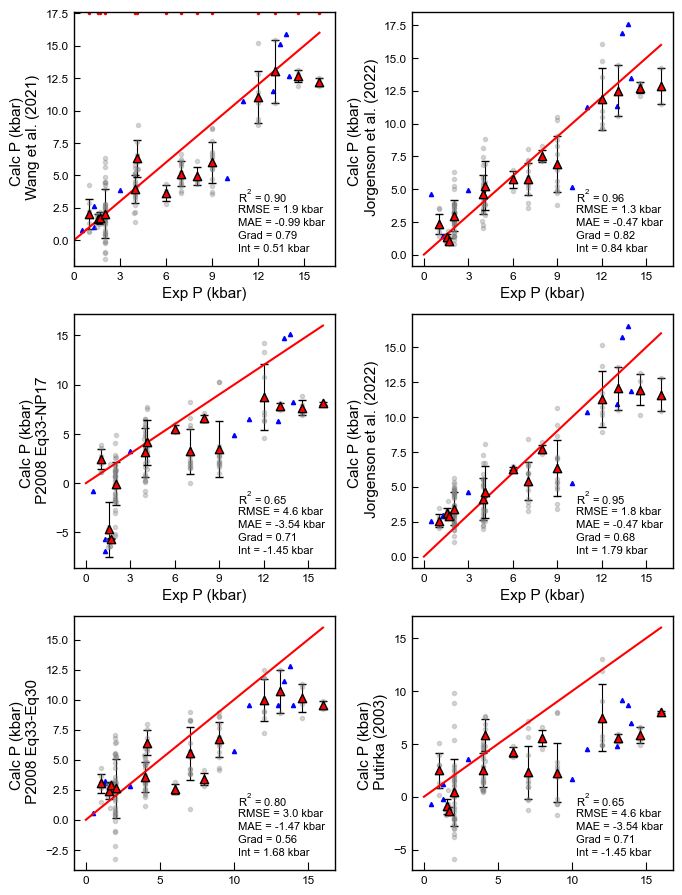

In [33]:
k=0
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore', category=UserWarning)

    w.simplefilter('ignore')
    
    from matplotlib import patches
    

    
    num_to_Av=15
yes='V'
if yes=='T':
    print('duh')
else:

        fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(3,2, figsize = (6.8,9)) # adjust dimensions of figure here
        
        ax0.set_xlim([0, 17])





        ## 1 to 1 lines for each plot
        ax0.plot([0, 16], [0, 16], '-r')
        ax1.plot([0, 16], [0, 16], '-r')
        ax2.plot([0, 16], [0, 16], '-r')
        ax3.plot([0, 16], [0, 16], '-r')
        ax4.plot([0, 16], [0, 16], '-r')
        ax5.plot([0, 16], [0, 16], '-r')


        ## Plotting all experiments

        j=0


        ax0_x=np.empty(len(vals))
        ax0_y=np.empty(len(vals))
        ax1_x=np.empty(len(vals))
        ax1_y=np.empty(len(vals))
        ax2_x=np.empty(len(vals))
        ax2_y=np.empty(len(vals))
        ax3_x=np.empty(len(vals))
        ax3_y=np.empty(len(vals))
        ax4_x=np.empty(len(vals))
        ax4_y=np.empty(len(vals))
        ax5_x=np.empty(len(vals))
        ax5_y=np.empty(len(vals))
        P=np.empty([len(vals)], 'float')
        for press in vals:

            RelevantP=(roundedP==press) #P[j]) #&  (cpx_Glass_Mask_All['P_kbar_x']>P[j]+0.1)    
            
            Nanalys=sum(cpx_Glass_Mask_All['N_meas_Cpx'].loc[RelevantP])
            N_Exp=len(cpx_Glass_Mask_All['Experiment_x'].loc[RelevantP].unique())
            
            Keep=(Nanalys>=num_to_Av)&(N_Exp>1)
            if Keep is False:
                #print('Not enough P='+str(press))
                ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Wang21_eq1'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Jorgenson22'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax3.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax4.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Put2008_eq30, T_Put2008_eq33)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)
                
                ax5.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P2003 P&T)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)
                    
                ax0_x[j]=np.nan
                ax0_y[j]=np.nan
                ax1_x[j]=np.nan
                ax1_y[j]=np.nan
                ax2_x[j]=np.nan
                ax2_y[j]=np.nan
                ax3_x[j]=np.nan
                ax3_y[j]=np.nan
                ax4_x[j]=np.nan
                ax4_y[j]=np.nan
                ax5_x[j]=np.nan
                ax5_y[j]=np.nan
            else:
                print('P='+str(press))
                print('number of Cpx='+str((Nanalys)))
                print('number studies='+str(sum(RelevantP)))
                #Plotting dots for each datapoint in a given bin on all 4 subplots

                msl=3


            # Plotting the money shot of the errorbar
                ax0.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                        np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                         xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                         yerr=np.nanstd(Calc['P_Wang21_eq1'].loc[RelevantP]),capsize=3,
                     fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax0_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax0_y[j]=np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP])

                ax1.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(Calc['P_Jorgenson22'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax1_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax1_y[j]=np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP])

                ax2.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax2_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax2_y[j]=np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP])

                ax3.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax3_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax3_y[j]=np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP])



                ax4.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Put2008_eq30, T_Put2008_eq33)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (P_Put2008_eq30, T_Put2008_eq33)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax4_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax4_y[j]=np.nanmean(CalcLiq['P_kbar: (P_Put2008_eq30, T_Put2008_eq33)'].loc[RelevantP])

                ax5.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P2003 P&T)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (P2003 P&T)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax5_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax5_y[j]=np.nanmean(CalcLiq['P_kbar: (P2003 P&T)'].loc[RelevantP])

                # Symbol by size of number of  averages
                s=ax0.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                              marker='^',
                            cmap='hot', ec='k', 
                              c='red', 
                                vmin = 5, vmax = 44,  zorder=100)  

                ax0.plot(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            17.5+0*np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                            '.r', ms=3)
                s=ax1.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP]),
                               marker='^',
                             cmap='hot', ec='k', 
                              c='red',
                               vmin = 5, vmax = 44,   zorder=100)    
                s=ax2.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                             marker='^',
                              cmap='hot', ec='k', 
                              c='red',
                            vmin = 5, vmax = 44,      zorder=100)      
                s=ax3.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),
                            marker='^',
                              cmap='hot', ec='k', 
                              c='red',
            vmin = 5, vmax = 44, zorder=100)
                
                s=ax4.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Put2008_eq30, T_Put2008_eq33)'].loc[RelevantP]),
                             marker='^',
                              cmap='hot', ec='k', 
                              c='red',
                            vmin = 5, vmax = 44,      zorder=100)      
                s=ax5.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P2003 P&T)'].loc[RelevantP]),
                            marker='^',
                              cmap='hot', ec='k', 
                              c='red',
            vmin = 5, vmax = 44, zorder=100)

                ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Wang21_eq1'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)




                ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Jorgenson22'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax3.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)
                
                ax4.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Put2008_eq30, T_Put2008_eq33)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax5.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P2003 P&T)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

            j=j+1




        # Adding statistics thro averages. 
        ax0_stats=pt.calculate_R2_Tukey(pd.Series(ax0_x), pd.Series(ax0_y)) 
        ax0_stats_noround=pt.calculate_R2(pd.Series(ax0_x), pd.Series(ax0_y))


        ax0.annotate("R$^{2}$ = "+str(ax0_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax0.annotate("RMSE = "+str(ax0_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax0.annotate("MAE = "+str(ax0_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax0.annotate("Grad = "+str(ax0_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax0.annotate("Int = "+str(ax0_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        ax1_stats=pt.calculate_R2_Tukey(pd.Series(ax1_x), pd.Series(ax1_y)) 
        ax1_stats_noround=pt.calculate_R2(pd.Series(ax1_x), pd.Series(ax1_y))

        ax1.annotate("R$^{2}$ = "+str(ax1_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax1.annotate("RMSE = "+str(ax1_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax1.annotate("MAE = "+str(ax1_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax1.annotate("Grad = "+str(ax1_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax1.annotate("Int = "+str(ax1_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
        ax2.annotate("R$^{2}$ = "+str(ax2_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax2.annotate("RMSE = "+str(ax2_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax2.annotate("MAE = "+str(ax2_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax2.annotate("Grad = "+str(ax2_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax2.annotate("Int = "+str(ax2_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        # Jorgenson Cpx-liq
        ax3_stats=pt.calculate_R2_Tukey(pd.Series(ax3_x), pd.Series(ax3_y)) 
        ax3_stats_noround=pt.calculate_R2(pd.Series(ax3_x), pd.Series(ax3_y))


        ax3.annotate("R$^{2}$ = "+str(ax3_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax3.annotate("RMSE = "+str(ax3_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax3.annotate("MAE = "+str(ax3_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax3.annotate("Grad = "+str(ax3_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax3.annotate("Int = "+str(ax3_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)        
        # Put2008 Neave
        ax5_stats=pt.calculate_R2_Tukey(pd.Series(ax2_x), pd.Series(ax2_y)) 
        ax5_stats_noround=pt.calculate_R2(pd.Series(ax2_x), pd.Series(ax2_y))


        ax5.annotate("R$^{2}$ = "+str(ax5_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax5.annotate("RMSE = "+str(ax5_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax5.annotate("MAE = "+str(ax5_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax5.annotate("Grad = "+str(ax5_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax5.annotate("Int = "+str(ax5_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        # Jorgenson Cpx-liq
        ax4_stats=pt.calculate_R2_Tukey(pd.Series(ax4_x), pd.Series(ax4_y)) 
        ax4_stats_noround=pt.calculate_R2(pd.Series(ax4_x), pd.Series(ax4_y))


        ax4.annotate("R$^{2}$ = "+str(ax4_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax4.annotate("RMSE = "+str(ax4_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax4.annotate("MAE = "+str(ax4_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax4.annotate("Grad = "+str(ax4_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax4.annotate("Int = "+str(ax4_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
        
        k=k+1

            ############ Axis labels
        ax0.set_xlabel('Exp P (kbar)')
        ax1.set_xlabel('Exp P (kbar)')
        ax2.set_xlabel('Exp P (kbar)')
        ax3.set_xlabel('Exp P (kbar)')
        ax0.set_ylabel('Calc P (kbar) \n Wang et al. (2021)')
        ax1.set_ylabel('Calc P (kbar) \n Jorgenson et al. (2022)')
        ax2.set_ylabel('Calc P (kbar) \n P2008 Eq33-NP17')
        ax3.set_ylabel('Calc P (kbar) \n Jorgenson et al. (2022)')
        ax4.set_ylabel('Calc P (kbar) \n P2008 Eq33-Eq30')
        ax5.set_ylabel('Calc P (kbar) \n Putirka (2003)')
        fig.tight_layout()
        #fig.colorbar(s, ax=ax1)
        #fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax1)
        ax0.set_ylim([-2, 17.6])
        name='Pressure_Avs_Bins_6size.png'.format(num_to_Av)
        print(name)
        ax0.set_xticks([0, 3, 6, 9, 12, 15])
        ax1.set_xticks([0, 3, 6, 9, 12, 15])
        ax2.set_xticks([0, 3, 6, 9, 12, 15])
        ax3.set_xticks([0, 3, 6, 9, 12, 15])
        fig.savefig(name, dpi=300)
    

## Lets do this for N=0 Cpx instead

C:\Users\penny\AppData\Local\Temp\ipykernel_23656\1552615064.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_23656\1552615064.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_23656\1552615064.py:65: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
C:\Users\penny\AppData\Local\Temp\ipykernel_23656\1552615064.py:69: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "^k" (-> color='k'). The keyw

P=1.0
number of Cpx=65
number studies=7
P=1.2000000000000002
number of Cpx=10
number studies=2
P=1.6
number of Cpx=60
number studies=7
P=1.8
number of Cpx=18
number studies=2
P=2.0
number of Cpx=272
number studies=44
P=4.0
number of Cpx=347
number studies=24
P=4.2
number of Cpx=45
number studies=7
P=6.0
number of Cpx=57
number studies=3
P=7.0
number of Cpx=148
number studies=14
P=8.0
number of Cpx=72
number studies=4
P=9.0
number of Cpx=213
number studies=14
P=12.0
number of Cpx=143
number studies=8
P=13.200000000000001
number of Cpx=43
number studies=2
P=14.600000000000001
number of Cpx=90
number studies=4
P=16.0
number of Cpx=53
number studies=2
Pressure_Avs_Bins_0.png


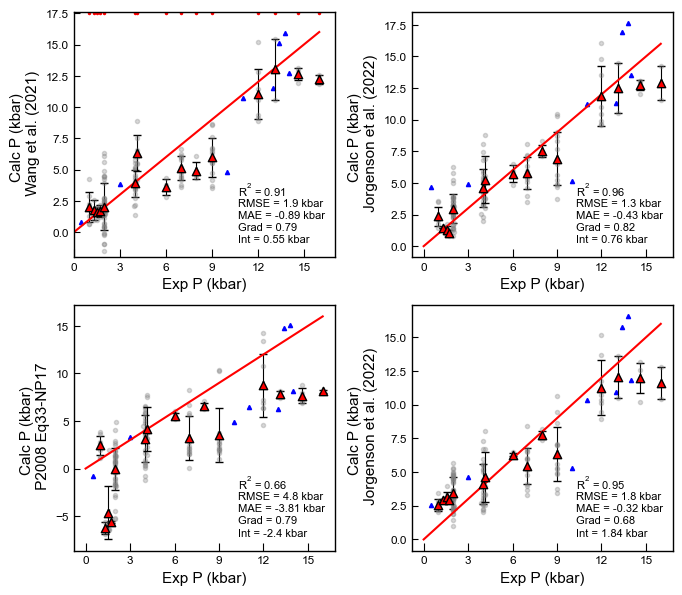

In [50]:

import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore', category=UserWarning)

    w.simplefilter('ignore')
    
    from matplotlib import patches
    

    
    num_to_Av=0
yes='V'
if yes=='T':
    print('duh')
else:

        fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (6.8,6)) # adjust dimensions of figure here
        
        ax0.set_xlim([0, 17])





        ## 1 to 1 lines for each plot
        ax0.plot([0, 16], [0, 16], '-r')
        ax1.plot([0, 16], [0, 16], '-r')
        ax2.plot([0, 16], [0, 16], '-r')
        ax3.plot([0, 16], [0, 16], '-r')



        ## Plotting all experiments

        j=0


        ax0_x=np.empty(len(vals))
        ax0_y=np.empty(len(vals))
        ax1_x=np.empty(len(vals))
        ax1_y=np.empty(len(vals))
        ax2_x=np.empty(len(vals))
        ax2_y=np.empty(len(vals))
        ax3_x=np.empty(len(vals))
        ax3_y=np.empty(len(vals))
        P=np.empty([len(vals)], 'float')
        for press in vals:

            RelevantP=(roundedP==press) #P[j]) #&  (cpx_Glass_Mask_All['P_kbar_x']>P[j]+0.1)    
            
            Nanalys=sum(cpx_Glass_Mask_All['N_meas_Cpx'].loc[RelevantP])
            N_Exp=len(cpx_Glass_Mask_All['Experiment_x'].loc[RelevantP].unique())
            
            Keep=(Nanalys>=num_to_Av)&(N_Exp>1)
            if Keep is False:
                #print('Not enough P='+str(press))
                ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Wang21_eq1'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Jorgenson22'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax3.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax0_x[j]=np.nan
                ax0_y[j]=np.nan
                ax1_x[j]=np.nan
                ax1_y[j]=np.nan
                ax2_x[j]=np.nan
                ax2_y[j]=np.nan
                ax3_x[j]=np.nan
                ax3_y[j]=np.nan
            else:
                print('P='+str(press))
                print('number of Cpx='+str((Nanalys)))
                print('number studies='+str(sum(RelevantP)))
                #Plotting dots for each datapoint in a given bin on all 4 subplots

                msl=3


            # Plotting the money shot of the errorbar
                ax0.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                        np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                         xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                         yerr=np.nanstd(Calc['P_Wang21_eq1'].loc[RelevantP]),capsize=3,
                     fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax0_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax0_y[j]=np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP])

                ax1.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(Calc['P_Jorgenson22'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax1_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax1_y[j]=np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP])

                ax2.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax2_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax2_y[j]=np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP])

                ax3.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax3_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax3_y[j]=np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP])



                # Symbol by size of number of  averages
                s=ax0.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                              marker='^',
                            cmap='hot', ec='k', 
                              c='red', 
                                vmin = 5, vmax = 44,  zorder=100)  

                ax0.plot(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            17.5+0*np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                            '.r', ms=3)
                s=ax1.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP]),
                               marker='^',
                             cmap='hot', ec='k', 
                              c='red',
                               vmin = 5, vmax = 44,   zorder=100)    
                s=ax2.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                             marker='^',
                              cmap='hot', ec='k', 
                              c='red',
                            vmin = 5, vmax = 44,      zorder=100)      
                s=ax3.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),
                            marker='^',
                              cmap='hot', ec='k', 
                              c='red',
            vmin = 5, vmax = 44, zorder=100)

                ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Wang21_eq1'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)




                ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Jorgenson22'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax3.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

            j=j+1




        # Adding statistics thro averages. 
        ax0_stats=pt.calculate_R2_Tukey(pd.Series(ax0_x), pd.Series(ax0_y)) 
        ax0_stats_noround=pt.calculate_R2(pd.Series(ax0_x), pd.Series(ax0_y))


        ax0.annotate("R$^{2}$ = "+str(ax0_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax0.annotate("RMSE = "+str(ax0_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax0.annotate("MAE = "+str(ax0_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax0.annotate("Grad = "+str(ax0_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax0.annotate("Int = "+str(ax0_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        ax1_stats=pt.calculate_R2_Tukey(pd.Series(ax1_x), pd.Series(ax1_y)) 
        ax1_stats_noround=pt.calculate_R2(pd.Series(ax1_x), pd.Series(ax1_y))

        ax1.annotate("R$^{2}$ = "+str(ax1_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax1.annotate("RMSE = "+str(ax1_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax1.annotate("MAE = "+str(ax1_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax1.annotate("Grad = "+str(ax1_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax1.annotate("Int = "+str(ax1_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
        
        # Put2008 Neave
        ax2_stats=pt.calculate_R2_Tukey(pd.Series(ax2_x), pd.Series(ax2_y)) 
        ax2_stats_noround=pt.calculate_R2(pd.Series(ax2_x), pd.Series(ax2_y))


        ax2.annotate("R$^{2}$ = "+str(ax2_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax2.annotate("RMSE = "+str(ax2_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax2.annotate("MAE = "+str(ax2_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax2.annotate("Grad = "+str(ax2_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax2.annotate("Int = "+str(ax2_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        # Jorgenson Cpx-liq
        ax3_stats=pt.calculate_R2_Tukey(pd.Series(ax3_x), pd.Series(ax3_y)) 
        ax3_stats_noround=pt.calculate_R2(pd.Series(ax3_x), pd.Series(ax3_y))


        ax3.annotate("R$^{2}$ = "+str(ax3_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax3.annotate("RMSE = "+str(ax3_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax3.annotate("MAE = "+str(ax3_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax3.annotate("Grad = "+str(ax3_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax3.annotate("Int = "+str(ax3_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
        
        k=k+1


## Lets do all instead to show the difference in the supplement

P=0.4
number of Cpx=5
number studies=1
P=1.0
number of Cpx=65
number studies=7
P=1.2000000000000002
number of Cpx=10
number studies=2
P=1.6
number of Cpx=60
number studies=7
P=1.8
number of Cpx=18
number studies=2
P=2.0
number of Cpx=272
number studies=44
P=3.0
number of Cpx=8
number studies=1
P=4.0
number of Cpx=347
number studies=24
P=4.2
number of Cpx=45
number studies=7
P=6.0
number of Cpx=57
number studies=3
P=7.0
number of Cpx=148
number studies=14
P=8.0
number of Cpx=72
number studies=4
P=9.0
number of Cpx=213
number studies=14
P=10.0
number of Cpx=11
number studies=1
P=11.0
number of Cpx=18
number studies=1
P=12.0
number of Cpx=143
number studies=8
P=13.0
number of Cpx=24
number studies=1
P=13.200000000000001
number of Cpx=43
number studies=2
P=13.4
number of Cpx=15
number studies=1
P=13.8
number of Cpx=22
number studies=1
P=14.0
number of Cpx=25
number studies=1
P=14.600000000000001
number of Cpx=90
number studies=4
P=16.0
number of Cpx=53
number studies=2
Pressure_Avs_Bins_Fo

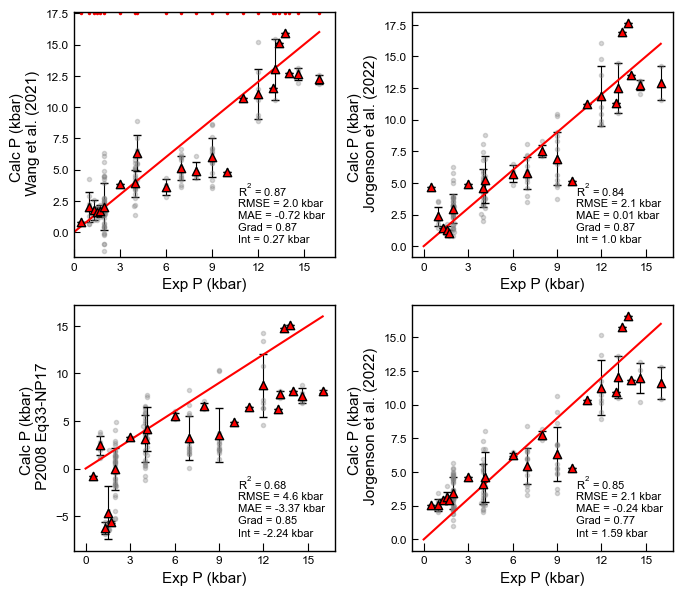

In [22]:

import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore', category=UserWarning)

    w.simplefilter('ignore')
    
    from matplotlib import patches
    

    
    num_to_Av=0
yes='V'
if yes=='T':
    print('duh')
else:

        fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (6.8,6)) # adjust dimensions of figure here
        k=0
        ax0.set_xlim([0, 17])





        ## 1 to 1 lines for each plot
        ax0.plot([0, 16], [0, 16], '-r')
        ax1.plot([0, 16], [0, 16], '-r')
        ax2.plot([0, 16], [0, 16], '-r')
        ax3.plot([0, 16], [0, 16], '-r')



        ## Plotting all experiments

        j=0


        ax0_x=np.empty(len(vals))
        ax0_y=np.empty(len(vals))
        ax1_x=np.empty(len(vals))
        ax1_y=np.empty(len(vals))
        ax2_x=np.empty(len(vals))
        ax2_y=np.empty(len(vals))
        ax3_x=np.empty(len(vals))
        ax3_y=np.empty(len(vals))
        P=np.empty([len(vals)], 'float')
        for press in vals:

            RelevantP=(roundedP==press) #P[j]) #&  (cpx_Glass_Mask_All['P_kbar_x']>P[j]+0.1)    
            
            Nanalys=sum(cpx_Glass_Mask_All['N_meas_Cpx'].loc[RelevantP])
            N_Exp=len(cpx_Glass_Mask_All['Experiment_x'].loc[RelevantP].unique())
            
            Keep=(Nanalys>=num_to_Av)&(N_Exp>0)
            if Keep is False:
                #print('Not enough P='+str(press))
                ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Wang21_eq1'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Jorgenson22'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax3.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP], 
                 '^k', color='blue', alpha=1, zorder=0, ms=3)

                ax0_x[j]=np.nan
                ax0_y[j]=np.nan
                ax1_x[j]=np.nan
                ax1_y[j]=np.nan
                ax2_x[j]=np.nan
                ax2_y[j]=np.nan
                ax3_x[j]=np.nan
                ax3_y[j]=np.nan
            else:
                print('P='+str(press))
                print('number of Cpx='+str((Nanalys)))
                print('number studies='+str(sum(RelevantP)))
                #Plotting dots for each datapoint in a given bin on all 4 subplots

                msl=3


            # Plotting the money shot of the errorbar
                ax0.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                        np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                         xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                         yerr=np.nanstd(Calc['P_Wang21_eq1'].loc[RelevantP]),capsize=3,
                     fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax0_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax0_y[j]=np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP])

                ax1.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(Calc['P_Jorgenson22'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax1_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax1_y[j]=np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP])

                ax2.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax2_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax2_y[j]=np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP])

                ax3.errorbar(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),
                             xerr=np.nanstd(x_P_kbar_Mask_All.loc[RelevantP]), 
                             yerr=np.nanstd(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),capsize=3,
                         fmt='^', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

                ax3_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax3_y[j]=np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP])



                # Symbol by size of number of  averages
                s=ax0.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                              marker='^',
                            cmap='hot', ec='k', 
                              c='red', 
                                vmin = 5, vmax = 44,  zorder=100)  

                ax0.plot(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            17.5+0*np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                            '.r', ms=3)
                s=ax1.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP]),
                               marker='^',
                             cmap='hot', ec='k', 
                              c='red',
                               vmin = 5, vmax = 44,   zorder=100)    
                s=ax2.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                             marker='^',
                              cmap='hot', ec='k', 
                              c='red',
                            vmin = 5, vmax = 44,      zorder=100)      
                s=ax3.scatter(np.nanmean(x_P_kbar_Mask_All.loc[RelevantP]),
                            np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP]),
                            marker='^',
                              cmap='hot', ec='k', 
                              c='red',
            vmin = 5, vmax = 44, zorder=100)

                ax0.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Wang21_eq1'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)




                ax1.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    Calc['P_Jorgenson22'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax2.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

                ax3.plot(x_P_kbar_Mask_All.loc[RelevantP],
                    CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP], 
                 '.', color='grey', alpha=0.3, zorder=0)

            j=j+1




        # Adding statistics thro averages. 
        ax0_stats=pt.calculate_R2_Tukey(pd.Series(ax0_x), pd.Series(ax0_y)) 
        ax0_stats_noround=pt.calculate_R2(pd.Series(ax0_x), pd.Series(ax0_y))


        ax0.annotate("R$^{2}$ = "+str(ax0_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax0.annotate("RMSE = "+str(ax0_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax0.annotate("MAE = "+str(ax0_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax0.annotate("Grad = "+str(ax0_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax0.annotate("Int = "+str(ax0_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        ax1_stats=pt.calculate_R2_Tukey(pd.Series(ax1_x), pd.Series(ax1_y)) 
        ax1_stats_noround=pt.calculate_R2(pd.Series(ax1_x), pd.Series(ax1_y))

        ax1.annotate("R$^{2}$ = "+str(ax1_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax1.annotate("RMSE = "+str(ax1_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax1.annotate("MAE = "+str(ax1_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax1.annotate("Grad = "+str(ax1_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax1.annotate("Int = "+str(ax1_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
        
        # Put2008 Neave
        ax2_stats=pt.calculate_R2_Tukey(pd.Series(ax2_x), pd.Series(ax2_y)) 
        ax2_stats_noround=pt.calculate_R2(pd.Series(ax2_x), pd.Series(ax2_y))


        ax2.annotate("R$^{2}$ = "+str(ax2_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax2.annotate("RMSE = "+str(ax2_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax2.annotate("MAE = "+str(ax2_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax2.annotate("Grad = "+str(ax2_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax2.annotate("Int = "+str(ax2_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)

        # Jorgenson Cpx-liq
        ax3_stats=pt.calculate_R2_Tukey(pd.Series(ax3_x), pd.Series(ax3_y)) 
        ax3_stats_noround=pt.calculate_R2(pd.Series(ax3_x), pd.Series(ax3_y))


        ax3.annotate("R$^{2}$ = "+str(ax3_stats['R$^{2}$']),
                               xy=(0.63, 0.25), xycoords="axes fraction", fontsize=8)
        ax3.annotate("RMSE = "+str(ax3_stats['RMSE_num']) +" kbar",
                                   xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
        ax3.annotate("MAE = "+str(ax3_stats['Mean Error']) +" kbar",
                                   xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
        ax3.annotate("Grad = "+str(ax3_stats['Grad']),
                                   xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
        ax3.annotate("Int = "+str(ax3_stats['Int']) +" kbar",
                                   xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
        
        k=k+1

            ############ Axis labels
        ax0.set_xlabel('Exp P (kbar)')
        ax1.set_xlabel('Exp P (kbar)')
        ax2.set_xlabel('Exp P (kbar)')
        ax3.set_xlabel('Exp P (kbar)')
        ax0.set_ylabel('Calc P (kbar) \n Wang et al. (2021)')
        ax1.set_ylabel('Calc P (kbar) \n Jorgenson et al. (2022)')
        ax2.set_ylabel('Calc P (kbar) \n P2008 Eq33-NP17')
        ax3.set_ylabel('Calc P (kbar) \n Jorgenson et al. (2022)')
        fig.tight_layout()
        #fig.colorbar(s, ax=ax1)
        #fig.colorbar(cm.ScalarMappable(cmap=cmap), ax=ax1)
        ax0.set_ylim([-2, 17.6])
        name='Pressure_Avs_Bins_ForSupp.png'.format(num_to_Av)
        print(name)
        ax0.set_xticks([0, 3, 6, 9, 12, 15])
        ax1.set_xticks([0, 3, 6, 9, 12, 15])
        ax2.set_xticks([0, 3, 6, 9, 12, 15])
        ax3.set_xticks([0, 3, 6, 9, 12, 15])
        fig.savefig(name, dpi=300)
        

In [53]:

import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore', category=UserWarning)

    w.simplefilter('ignore')
    
    from matplotlib import patches
    

    
    avs=np.linspace(0, 20, 21) #[1, 2, 3, 4]
    RMSE_Jor_Cpxo=np.empty(len(avs), dtype=float)
    R2_Jor_Cpxo=np.empty(len(avs), dtype=float)
    RMSE_Wang_Cpxo=np.empty(len(avs), dtype=float)
    R2_Wang_Cpxo=np.empty(len(avs), dtype=float)
    RMSE_Jor_Cpxl=np.empty(len(avs), dtype=float)
    R2_Jor_Cpxl=np.empty(len(avs), dtype=float)
    RMSE_Neave_Cpxl=np.empty(len(avs), dtype=float)
    R2_Neave_Cpxl=np.empty(len(avs), dtype=float)
    k=0
    for v in avs:
        #print('v='+str(v))
       


        j=0

        ax0_x=np.empty(len(vals))
        ax0_y=np.empty(len(vals))
        ax1_x=np.empty(len(vals))
        ax1_y=np.empty(len(vals))
        ax2_x=np.empty(len(vals))
        ax2_y=np.empty(len(vals))
        ax3_x=np.empty(len(vals))
        ax3_y=np.empty(len(vals))
        P=np.empty([len(vals)], 'float')
        for press in vals:
            print(press)
            RelevantP=(roundedP==press) #P[j]) #&  (cpx_Glass_Mask_All['P_kbar_x']>P[j]+0.1)    
            
            Nanalys=sum(cpx_Glass_Mask_All['N_meas_Cpx'].loc[RelevantP])
            N_Exp=len(cpx_Glass_Mask_All['Experiment_x'].loc[RelevantP].unique())
            
            Keep=(N_Exp>=v)
            if Keep is False:
                #print('Not enough P='+str(press))

                ax0_x[j]=np.nan
                ax0_y[j]=np.nan
                ax1_x[j]=np.nan
                ax1_y[j]=np.nan
                ax2_x[j]=np.nan
                ax2_y[j]=np.nan
                ax3_x[j]=np.nan
                ax3_y[j]=np.nan
            else:

                ax0_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax0_y[j]=np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP])



                ax1_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax1_y[j]=np.nanmean(Calc['P_Jorgenson22'].loc[RelevantP])


                ax2_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax2_y[j]=np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP])


                ax3_x[j]=np.nanmean(x_P_kbar_Mask_All.loc[RelevantP])
                ax3_y[j]=np.nanmean(CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP])



                j=j+1


        # After it has looped over all the pressures for those averages

        # Adding statistics thro averages. 
        
        ax0_stats=pt.calculate_R2_Tukey(pd.Series(ax0_x), pd.Series(ax0_y)) 
        ax0_stats_noround=pt.calculate_R2(pd.Series(ax0_x), pd.Series(ax0_y))
        RMSE_Wang_Cpxo[k]=float(ax0_stats_noround['RMSE'])
        R2_Wang_Cpxo[k]=float(ax0_stats_noround['R2'])

        ax1_stats=pt.calculate_R2_Tukey(pd.Series(ax1_x), pd.Series(ax1_y)) 
        ax1_stats_noround=pt.calculate_R2(pd.Series(ax1_x), pd.Series(ax1_y))
        RMSE_Jor_Cpxo[k]=float(ax1_stats_noround['RMSE'])
        R2_Jor_Cpxo[k]=float(ax1_stats_noround['R2'])

        # Put2008 Neave
        ax2_stats=pt.calculate_R2_Tukey(pd.Series(ax2_x), pd.Series(ax2_y)) 
        ax2_stats_noround=pt.calculate_R2(pd.Series(ax2_x), pd.Series(ax2_y))
        RMSE_Neave_Cpxl[k]=float(ax2_stats_noround['RMSE'])
        R2_Neave_Cpxl[k]=float(ax2_stats_noround['R2'])



        # Jorgenson Cpx-liq
        ax3_stats=pt.calculate_R2_Tukey(pd.Series(ax3_x), pd.Series(ax3_y)) 
        ax3_stats_noround=pt.calculate_R2(pd.Series(ax3_x), pd.Series(ax3_y))
        RMSE_Jor_Cpxl[k]=float(ax3_stats_noround['RMSE'])
        R2_Jor_Cpxl[k]=float(ax3_stats_noround['R2'])


        k=k+1



0.4
1.0
1.2000000000000002
1.6
1.8
2.0
3.0
4.0
4.2
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
13.200000000000001
13.4
13.8
14.0
14.600000000000001
16.0
0.4
1.0
1.2000000000000002
1.6
1.8
2.0
3.0
4.0
4.2
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
13.200000000000001
13.4
13.8
14.0
14.600000000000001
16.0
0.4
1.0
1.2000000000000002
1.6
1.8
2.0
3.0
4.0
4.2
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
13.200000000000001
13.4
13.8
14.0
14.600000000000001
16.0
0.4
1.0
1.2000000000000002
1.6
1.8
2.0
3.0
4.0
4.2
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
13.200000000000001
13.4
13.8
14.0
14.600000000000001
16.0
0.4
1.0
1.2000000000000002
1.6
1.8
2.0
3.0
4.0
4.2
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
13.200000000000001
13.4
13.8
14.0
14.600000000000001
16.0
0.4
1.0
1.2000000000000002
1.6
1.8
2.0
3.0
4.0
4.2
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
13.200000000000001
13.4
13.8
14.0
14.600000000000001
16.0
0.4
1.0
1.2000000000000002
1.6
1.8
2.0
3.0
4.0
4.2
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
13.200000000000001
13.4
13.8
14.0
14.600000

In [54]:
a=pt.calculate_R2(pd.Series(ax0_x), pd.Series(ax0_y))
float(a['R2'])


0.87

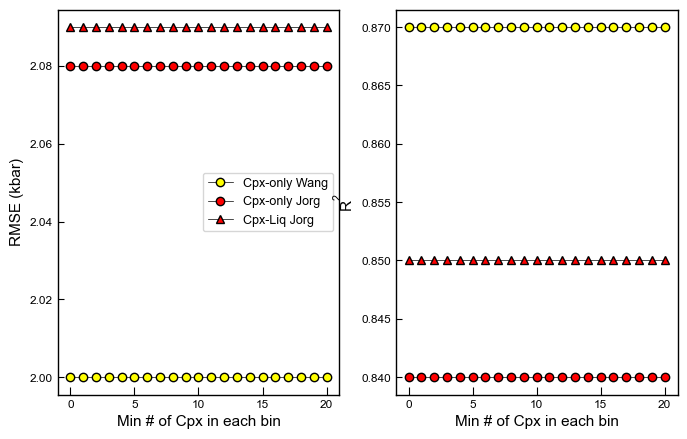

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))
ax1.plot( avs, RMSE_Wang_Cpxo,'-ok', mfc='yellow', label='Cpx-only Wang', lw=0.5)
ax1.plot( avs, RMSE_Jor_Cpxo,'-ok', mfc='red', label='Cpx-only Jorg', lw=0.5)
ax1.plot( avs, RMSE_Jor_Cpxl,'-^k', mfc='red', label='Cpx-Liq Jorg', lw=0.5)

ax2.plot( avs, R2_Wang_Cpxo,'-ok', mfc='yellow', label='Cpx-only Wang', lw=0.5)
ax2.plot( avs, R2_Jor_Cpxo,'-ok', mfc='red', label='Cpx-only Jorg', lw=0.5)
ax2.plot( avs, R2_Jor_Cpxl,'-^k', mfc='red', label='Cpx-Liq Jorg', lw=0.5)
#ax1.plot( avs, RMSE_Neave_Cpxl,'^k', mfc='black', label='Cpx-Liq Neave')
ax1.set_xlabel('Min # of Cpx in each bin')
ax1.set_ylabel('RMSE (kbar)')
ax2.set_xlabel('Min # of Cpx in each bin')
ax2.set_ylabel('R$^{2}$')
ax1.legend()

### pt.calculate_R2(pd.Series(ax0_x), pd.Series(ax0_y))

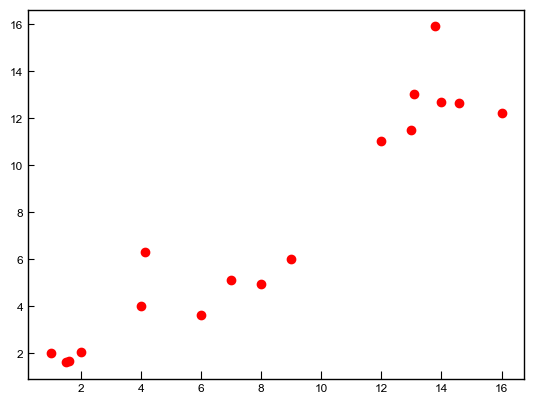

In [40]:
plt.plot(ax0_x, ax0_y, 'or')

## Tukey test for each of these

In [16]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

j=0


P=np.empty([len(vals)], 'float')
for i in vals:
    print(i)
    P[j]=i
    if j==0:
        RelevantP1=(cpx_Glass_Mask_All['P_kbar_x']<=P[j])
    if j==1:
        RelevantP2=(cpx_Glass_Mask_All['P_kbar_x']<=P[j]) &  (cpx_Glass_Mask_All['P_kbar_x']>P[j-1])               
    if j==2:
        RelevantP3=(cpx_Glass_Mask_All['P_kbar_x']<=P[j]) &  (cpx_Glass_Mask_All['P_kbar_x']>P[j-1])               
    if j==3:
        RelevantP4=(cpx_Glass_Mask_All['P_kbar_x']<=P[j]) &  (cpx_Glass_Mask_All['P_kbar_x']>P[j-1])               
    j=j+1
    


0.5
1.0
1.3
1.5
1.6
1.7
2.0
3.0
3.9
4.0
4.1
6.0
7.0
8.0
9.0
10.0


In [17]:

Wang1=pd.DataFrame(data={'group': '0-2.51 kbar',  'score': Calc['P_Wang21_eq1'].loc[RelevantP1]})
Wang2=pd.DataFrame(data={'group': '2.51-5.1 kbar',  'score': Calc['P_Wang21_eq1'].loc[RelevantP2]})
Wang3=pd.DataFrame(data={'group': '5.1-7.6 kbar',  'score':Calc['P_Wang21_eq1'].loc[RelevantP3]})
Wang4=pd.DataFrame(data={'group': '7.6-10.1 kbar',  'score':Calc['P_Wang21_eq1'].loc[RelevantP4]})
df=pd.concat([Wang1, Wang2, Wang3, Wang4])
df2=df.loc[df['score']>-5]
dfWang=df2.reset_index(drop=True)tukey = pairwise_tukeyhsd(endog=dfWang['score'],
                          groups=dfWang['group'],
                          alpha=0.05)
print(tukey)

SyntaxError: invalid syntax (1571676407.py, line 7)

In [ ]:

JorgCO1=pd.DataFrame(data={'group': '0-2.51 kbar',  'score': Calc['P_Jorgenson22'].loc[RelevantP1]})
JorgCO2=pd.DataFrame(data={'group': '2.51-5.1 kbar',  'score': Calc['P_Jorgenson22'].loc[RelevantP2]})
JorgCO3=pd.DataFrame(data={'group': '5.1-7.6 kbar',  'score':Calc['P_Jorgenson22'].loc[RelevantP3]})
JorgCO4=pd.DataFrame(data={'group': '7.6-10.1 kbar',  'score':Calc['P_Jorgenson22'].loc[RelevantP4]})
df=pd.concat([JorgCO1, JorgCO2, JorgCO3, JorgCO4])
df2=df.loc[df['score']>-5]
dfJorgCO=df2.reset_index(drop=True)
tukey = pairwise_tukeyhsd(endog=dfJorgCO['score'],
                          groups=dfJorgCO['group'],
                          alpha=0.05)
print(tukey)

In [ ]:

NPCL1=pd.DataFrame(data={'group': '0-2.51 kbar',  'score': CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP1]})
NPCL2=pd.DataFrame(data={'group': '2.51-5.1 kbar',  'score': CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP2]})
NPCL3=pd.DataFrame(data={'group': '5.1-7.6 kbar',  'score':CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP3]})
NPCL4=pd.DataFrame(data={'group': '7.6-10.1 kbar',  'score':CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP4]})
df=pd.concat([NPCL1, NPCL2, NPCL3, NPCL4])
df2=df.loc[df['score']>-5]
dfNPCL=df2.reset_index(drop=True)
tukey = pairwise_tukeyhsd(endog=dfNPCL['score'],
                          groups=dfNPCL['group'],
                          alpha=0.05)
print(tukey)

In [ ]:

JorgCL1=pd.DataFrame(data={'group': '0-2.51 kbar',  'sCLre': CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP1]})
JorgCL2=pd.DataFrame(data={'group': '2.51-5.1 kbar',  'sCLre': CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP2]})
JorgCL3=pd.DataFrame(data={'group': '5.1-7.6 kbar',  'sCLre':CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP3]})
JorgCL4=pd.DataFrame(data={'group': '7.6-10.1 kbar',  'sCLre':CalcLiq['P_kbar: (Jorgeson, 2022)'].loc[RelevantP4]})
df=pd.concat([JorgCL1, JorgCL2, JorgCL3, JorgCL4])
df2=df.loc[df['sCLre']>-5]
dfJorgCL=df2.reset_index(drop=True)
tukey = pairwise_tukeyhsd(endog=dfJorgCL['sCLre'],
                          groups=dfJorgCL['group'],
                          alpha=0.05)
print(tukey)

2.51


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

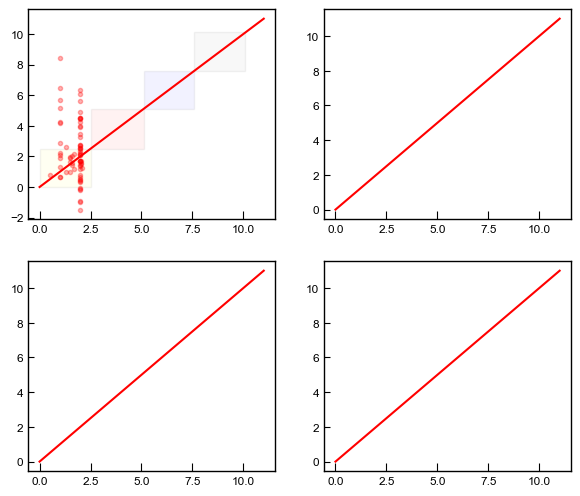

In [102]:
from matplotlib import patches
vals=np.array([2.51, 5.1, 7.6, 10.1])


rect0U = patches.Rectangle((0,0),vals[0],vals[0],linewidth=1,edgecolor='k',facecolor='yellow', alpha=0.05)
rect0M = patches.Rectangle((vals[0],vals[0]), vals[1]-vals[0], vals[1]-vals[0],linewidth=1,edgecolor='k',facecolor='red', alpha=0.05)
rect0L = patches.Rectangle((vals[1],vals[1]), vals[2]-vals[1], vals[2]-vals[1],linewidth=1,edgecolor='k',facecolor='blue', alpha=0.05)
rect0Mo = patches.Rectangle((vals[2],vals[2]), vals[3]-vals[2], vals[3]-vals[2],linewidth=1,edgecolor='k',facecolor='grey', alpha=0.05)

cols=['yellow', 'red', 'blue', 'grey']


fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (7,6)) # adjust dimensions of figure here
## 1 to 1 lines for each plot
ax0.plot([0, 11], [0, 11], '-r')
ax1.plot([0, 11], [0, 11], '-r')
ax2.plot([0, 11], [0, 11], '-r')
ax3.plot([0, 11], [0, 11], '-r')

ax0.add_patch(rect0U)
ax0.add_patch(rect0M)
ax0.add_patch(rect0L)
ax0.add_patch(rect0Mo)

## Plotting all experiments

j=0


P=np.empty([len(vals)], 'float')
for i in vals:
    print(i)
    P[j]=i
    if j==0:
        RelevantPWang=(cpx_Glass_Mask['P_kbar_x']<=P[j])
        RelevantPWang=(cpx_Glass_Mask_Wang['P_kbar_x']<=P[j])
        RelevantPJorg=(cpx_Glass_Mask_Jorg['P_kbar_x']<=P[j])
    else:
        RelevantP=(cpx_Glass_Mask['P_kbar_x']<=P[j]) &  (cpx_Glass_Mask['P_kbar_x']>P[j-1])               
        RelevantPWang=(cpx_Glass_Mask_Wang['P_kbar_x']<=P[j]) &  (cpx_Glass_Mask_Wang['P_kbar_x']>P[j-1])       
        RelevantPJorg=(cpx_Glass_Mask_Jorg['P_kbar_x']<=P[j]) &  (cpx_Glass_Mask_Jorg['P_kbar_x']>P[j-1])       
   
    
    # Plotting nice backgrounds
    ax0.plot(x_P_kbar_Mask_Wang.loc[RelevantPWang],
                CalcWang.P_kbar_calc.loc[RelevantPWang], 
             '.', color='red', alpha=0.3)
        
    ax2.plot(x_P_kbar_Mask.loc[RelevantP],
                CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP], 
             '.', color='red', alpha=0.3)

    # Plotting the money shot of the errorbar
    ax0.errorbar(np.nanmean(x_P_kbar_Mask_Wang.loc[RelevantPWang]),
                np.nanmean(CalcWang['P_kbar_calc'].loc[RelevantPWang]),
                 xerr=np.nanstd(x_P_kbar_Mask_Wang.loc[RelevantPWang]), 
                 yerr=np.nanstd(CalcWang['P_kbar_calc'].loc[RelevantPWang]),capsize=3,
             fmt='o', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)

    ax2.errorbar(np.nanmean(x_P_kbar_Mask.loc[RelevantP]),
                np.nanmean(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),
                 xerr=np.nanstd(x_P_kbar_Mask.loc[RelevantP]), 
                 yerr=np.nanstd(CalcLiq['P_kbar: (P_Neave17, T_Put2008_eq33)'].loc[RelevantP]),capsize=3,
             fmt='o', ecolor='k', elinewidth=0.8, mfc='cyan', ms=1, mec='k', zorder=0)
    
    
    print(sum(RelevantP))
    s=ax0.scatter(np.nanmean(x_P_kbar_Mask.loc[RelevantP]),
                np.nanmean(Calc['P_Wang21_eq1'].loc[RelevantP]),
                c='red', cmap='hot', ec='k', 
                  s=sum(RelevantP),
vmin = 20, vmax = 100, zorder=100)
    
    j=j+1
    
############ Axis labels
ax0.set_xlabel('Exp P (kbar)')
ax0.set_ylabel('Calc P (kbar) \n Wang et al. (2021)')
#fig.colorbar(s, ax=ax1)
#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax1)

In [ ]:
plt.plot(cpx_Glass_Mask['P_kbar_x'], cpx_Glass_Mask['P_kbar_x'], '.k')
for i in [2.5, 5.1, 7.5, 10]:
    plt.plot([i-2.5, i-2.5], [0, 10], '-r')
    #RelevantP=(cpx_Glass_Mask['P_kbar_x']>=(i-1.5)) & (cpx_Glass_Mask['P_kbar_x']<(i+1.5))  
#plt.plot([3, 3], [0, 10], '-b')

In [ ]:
plt.hist(cpx_Glass_Mask['P_kbar_x'])

## Calculating Statistics for temperature

In [ ]:
Temp_Stats_32d_32a=pt.calculate_R2_Tukey(x_T_Mask, 
                                         Calc['T_Put_Teq32d_Peq32a']) 
Press_Stats_32d_32a=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                         Calc['P_Put_Teq32d_Peq32a']) 
Temp_Stats_32d_subsol_32a=pt.calculate_R2_Tukey(x_T_Mask, 
                                         Calc['T_Put_Teq32d_subsol_Peq32a']) 
Press_Stats_32d_subsol_32a=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                         Calc['P_Put_Teq32d_subsol_Peq32a']) 

Temp_Stats_32d_32b=pt.calculate_R2_Tukey(x_T_Mask, 
                                         Calc['T_Put_Teq32d_Peq32b']) 
Press_Stats_32d_32b=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                         Calc['P_Put_Teq32d_Peq32b']) 
Temp_Stats_32d_subsol_32b=pt.calculate_R2_Tukey(x_T_Mask, 
                                         Calc['T_Put_Teq32d_subsol_Peq32b']) 
Press_Stats_32d_subsol_32b=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                         Calc['P_Put_Teq32d_subsol_Peq32b']) 

Temp_Stats_Wang=pt.calculate_R2_Tukey(x_T_Mask_Wang, 
                                         CalcWang.T_K_calc) 
Press_Stats_Wang=pt.calculate_R2_Tukey(x_P_kbar_Mask_Wang, 
                                         CalcWang.P_kbar_calc) 

Temp_Stats_Jorg=pt.calculate_R2_Tukey(x_T_Mask_Jorg, 
                                        CalcJorg.T_K_calc) 
Press_Stats_Jorg=pt.calculate_R2_Tukey(x_P_kbar_Mask_Jorg, 
                                         CalcJorg.P_kbar_calc) 
Press_Stats_Petrelli=pt.calculate_R2_Tukey(x_P_kbar_Mask, 
                                         Calc['P_Petrelli20']) 
Press_Stats_Petrelli2=pt.calculate_R2_Tukey(x_P_kbar_Mask_Jorg, 
                                         CalcPet.P_kbar_calc) 



ValueError: x and y must have same first dimension, but have shapes (17,) and (14,)

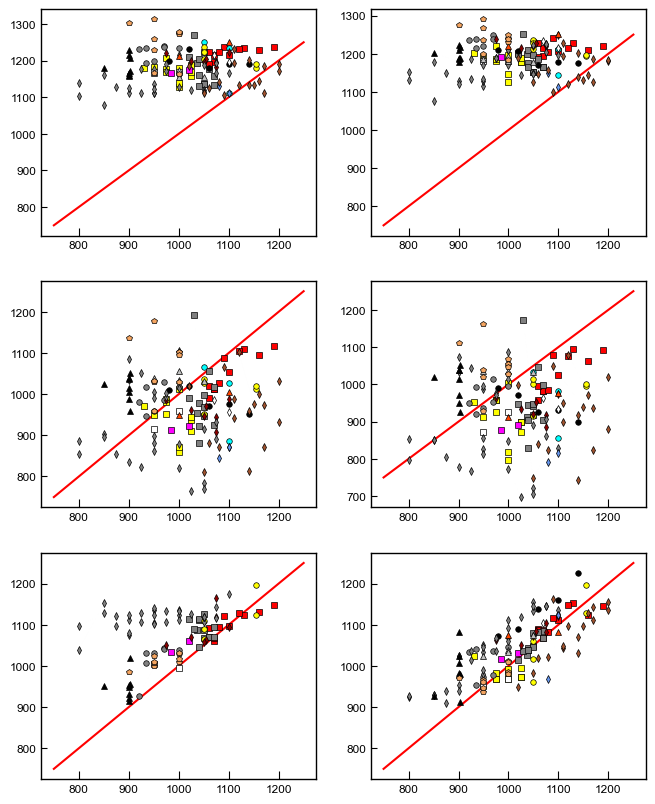

In [37]:
fig, ((ax0, ax1), (ax4, ax5), (ax2, ax3)) = plt.subplots(3,2, figsize = (7.8,10)) # adjust dimensions of figure here
lin_min=750
lin_max=1250

face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'yellow', 'orange')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '*', '*')


nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6)

ax0.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax3.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax4.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax5.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  
    
## 32-32a
    ax0.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_Put_Teq32d_Peq32a'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

## 32-32b
    
    ax1.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_Put_Teq32d_Peq32b'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    
## 32-32a
    ax4.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_Put_Teq32d_subsol_Peq32a'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

## 32-32b
    
    ax5.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_Put_Teq32d_subsol_Peq32b'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
    
 # Jorgenson  
    ax2.plot(x_T_Mask_Jorg.loc[cpx_Glass_Mask_Jorg['Citation_x']==ref]-273.15,
             CalcJorg['T_K_calc'].loc[cpx_Glass_Mask_Jorg['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    # Wang
    ax3.plot(x_T_Mask_Wang.loc[cpx_Glass_Mask_Wang['Citation_x']==ref]-273.15,
             CalcWang['T_K_calc'].loc[cpx_Glass_Mask_Wang['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
        
        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33
ax0.annotate("a) T=P2008 eq32d, P=P2008 eq32a", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax1.annotate("b) T=P2008 eq32d, P=P2008 eq32b", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax4.annotate("c) T=P2008 eq32d subsol,  \n P=P2008 eq32a", xy=(0.3, 0.05), xycoords="axes fraction",
             fontsize=11)
ax5.annotate("d) T=P2008 eq32d subsol, \n P=P2008 eq32b", xy=(0.3, 0.05), 
             xycoords="axes fraction",  fontsize=11)
ax2.annotate("e) Jorgenson et al. (2022)", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax3.annotate("f) Wang et al. (2021) Eq2", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)

# Statistics - #############################################3

Temp_Stats_PN17_Teq33=Temp_Stats_32d_32a
ax0.annotate("R$^{2}$ = "+str(Temp_Stats_PN17_Teq33['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax0.annotate("RMSE = "+str(Temp_Stats_PN17_Teq33['RMSE_num']) +"°C",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax0.annotate("MAE = "+str(Temp_Stats_PN17_Teq33['Mean Error']) +"°C",
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
ax0.annotate("Grad = "+str(Temp_Stats_PN17_Teq33['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax0.annotate("Int = "+str(Temp_Stats_PN17_Teq33['Int']) +"°C",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)

Temp_Stats_30_Teq33=Temp_Stats_32d_32b
ax1.annotate("R$^{2}$ = "+str(Temp_Stats_30_Teq33['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax1.annotate("RMSE = "+str(Temp_Stats_30_Teq33['RMSE_num']) +"°C",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax1.annotate("MAE = "+str(Temp_Stats_30_Teq33['Mean Error']) +"°C",
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
ax1.annotate("Grad = "+str(Temp_Stats_30_Teq33['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax1.annotate("Int = "+str(Temp_Stats_30_Teq33['Int']) +"°C",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)



x_sub=0.05
y_off=0.68
Temp_Stats_PN17_Teq33=Temp_Stats_32d_subsol_32a
ax4.annotate("R$^{2}$ = "+str(Temp_Stats_PN17_Teq33['R$^{2}$']),
                           xy=(x_sub, 0.25+y_off), xycoords="axes fraction", fontsize=8)
ax4.annotate("RMSE = "+str(Temp_Stats_PN17_Teq33['RMSE_num']) +"°C",
                           xy=(x_sub, 0.2+y_off), xycoords="axes fraction", fontsize=8)
ax4.annotate("MAE = "+str(Temp_Stats_PN17_Teq33['Mean Error']) +"°C",
                           xy=(x_sub, 0.15+y_off), xycoords="axes fraction", fontsize=8)
ax4.annotate("Grad = "+str(Temp_Stats_PN17_Teq33['Grad']),
                           xy=(x_sub, 0.1+y_off), xycoords="axes fraction", fontsize=8)
ax4.annotate("Int = "+str(Temp_Stats_PN17_Teq33['Int']) +"°C",
                           xy=(x_sub, 0.05+y_off), xycoords="axes fraction", fontsize=8)

Temp_Stats_30_Teq33=Temp_Stats_32d_subsol_32b
ax5.annotate("R$^{2}$ = "+str(Temp_Stats_30_Teq33['R$^{2}$']),
                           xy=(x_sub, 0.25+y_off), xycoords="axes fraction", fontsize=8)
ax5.annotate("RMSE = "+str(Temp_Stats_30_Teq33['RMSE_num']) +"°C",
                           xy=(x_sub, 0.2+y_off), xycoords="axes fraction", fontsize=8)
ax5.annotate("MAE = "+str(Temp_Stats_30_Teq33['Mean Error']) +"°C",
                           xy=(x_sub, 0.15+y_off), xycoords="axes fraction", fontsize=8)
ax5.annotate("Grad = "+str(Temp_Stats_30_Teq33['Grad']),
                           xy=(x_sub, 0.1+y_off), xycoords="axes fraction", fontsize=8)
ax5.annotate("Int = "+str(Temp_Stats_30_Teq33['Int']) +"°C",
                           xy=(x_sub, 0.05+y_off), xycoords="axes fraction", fontsize=8)



ax2.annotate("R$^{2}$ = "+str(Temp_Stats_Jorg['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax2.annotate("RMSE = "+str(Temp_Stats_Jorg['RMSE_num']) +"°C",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax2.annotate("MAE = "+str(Temp_Stats_Jorg['Mean Error']) +"°C",
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
ax2.annotate("Grad = "+str(Temp_Stats_Jorg['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax2.annotate("Int = "+str(Temp_Stats_Jorg['Int']) +"°C",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)


Temp_Stats_32c_Teq33=Temp_Stats_Wang
ax3.annotate("R$^{2}$ = "+str(Temp_Stats_32c_Teq33['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax3.annotate("RMSE = "+str(Temp_Stats_32c_Teq33['RMSE_num']) +"°C",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax3.annotate("MAE = "+str(Temp_Stats_32c_Teq33['Mean Error']),
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)

ax3.annotate("Grad = "+str(Temp_Stats_32c_Teq33['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax3.annotate("Int = "+str(Temp_Stats_32c_Teq33['Int']) +"°C",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)






plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
ax0.set_ylabel('Calc T (°C)')
ax4.set_ylabel('Calc T (°C)')
ax2.set_ylabel('Calc T (°C)')
ax2.set_xlabel('Exp T (°C)')
ax3.set_xlabel('Exp T (°C)')
ax0.set_ylim([850, 1350])
ax1.set_ylim([850, 1350])
ax4.set_ylim([600, 1300])
ax5.set_ylim([600, 1300])
fig.savefig('Cpx_only_Temp_Comparison_lABELLED.png', dpi=300)

In [ ]:
plt.plot(CalcWang.T_K_calc,
    x_T_Mask_Wang-CalcWang.T_K_calc,
             'ok', mfc='cyan', ms=4)

In [ ]:
Wang_Cali=pt.return_cali_dataset(model="Wang2021")
cpx_comps_Mask_Wang=pt.calculate_clinopyroxene_liquid_components(cpx_comps=Cpx_Mask_Wang, liq_comps=Liq_Mask_Wang)


fig, ((ax3b),(ax3a)) = plt.subplots(2, 1, figsize=(3.5,3),gridspec_kw={'height_ratios': [0.5, 4]})
plt.subplots_adjust(wspace=0, hspace=0)



ax3a.plot([np.max(Wang_Cali['SiO2_Liq']), np.max(Wang_Cali['SiO2_Liq'])],
          [-300, 130], '-', color='grey')

ax3a.set_ylim([-300, 130])
ncolor=0
nmarkers=0
Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  

    ax3a.plot(cpx_comps_Mask_Wang['SiO2_Liq'].loc[cpx_Glass_Mask_Wang['Citation_x']==ref],
    x_T_Mask_Wang.loc[cpx_Glass_Mask_Wang['Citation_x']==ref]-CalcWang.T_K_calc.loc[cpx_Glass_Mask_Wang['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    ncolor+=1
    nmarkers+=1       
ax3a.set_ylabel('Exp - Calc T (°C)')
ax3a.set_xlabel('SiO$_2$ Liq (wt%)')
ax3b.hist(Wang_Cali['SiO2_Liq'], ec='k', color='grey')
ax3b.axes.get_xaxis().set_visible(False)
ax3b.axes.get_yaxis().set_visible(False)
ax3b.set_xlim([40, 80])
ax3a.set_xlim([40, 80])
ax3b.axis("off")
print(np.max(Wang_Cali['SiO2_Liq']))
fig.savefig('WangSiO2Offsets.png', dpi=300, bbox_inches='tight')

In [ ]:
Wang_Cali=pt.return_cali_dataset(model="Wang2021")
cpx_comps_Mask_Wang=pt.calculate_clinopyroxene_liquid_components(cpx_comps=Cpx_Mask_Wang, liq_comps=Liq_Mask_Wang)


fig, ((ax3b),(ax3a)) = plt.subplots(2, 1, figsize=(3.5,3),gridspec_kw={'height_ratios': [0.5, 4]})
plt.subplots_adjust(wspace=0, hspace=0)



# ax3a.plot([np.max(Wang_Cali['SiO2_Liq']), np.max(Wang_Cali['SiO2_Liq'])],
#           [-300, 130], '-', color='grey')

#ax3a.set_ylim([-300, 130])
ncolor=0
nmarkers=0
Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  

    ax3a.plot(cpx_comps_Mask_Wang['SiO2_Liq'].loc[cpx_Glass_Mask_Wang['Citation_x']==ref],
    x_P_kbar_Mask_Wang.loc[cpx_Glass_Mask_Wang['Citation_x']==ref]-CalcWang.P_kbar_calc.loc[cpx_Glass_Mask_Wang['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    ncolor+=1
    nmarkers+=1       
ax3a.set_ylabel('Exp - Calc T (°C)')
ax3a.set_xlabel('SiO$_2$ Liq (wt%)')
ax3b.hist(Wang_Cali['SiO2_Liq'], ec='k', color='grey')
ax3b.axes.get_xaxis().set_visible(False)
ax3b.axes.get_yaxis().set_visible(False)
ax3b.set_xlim([40, 80])
ax3a.set_xlim([40, 80])
ax3b.axis("off")
print(np.max(Wang_Cali['SiO2_Liq']))
fig.savefig('WangSiO2Offsets.png', dpi=300, bbox_inches='tight')

In [ ]:
fig, ((ax3b),(ax3a)) = plt.subplots(2, 1, figsize=(3.5,3),gridspec_kw={'height_ratios': [0.5, 4]})
plt.subplots_adjust(wspace=0, hspace=0)

LowSiO2=cpx_Glass_Mask_Wang['SiO2_Liq']<60

ncolor=0
nmarkers=0
Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  

    ax3a.plot(
    x_T_Mask_Wang.loc[(cpx_Glass_Mask_Wang['Citation_x']==ref) & (LowSiO2)]-273.15,
        CalcWang.T_K_calc.loc[(cpx_Glass_Mask_Wang['Citation_x']==ref) & (LowSiO2)]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    ncolor+=1
    nmarkers+=1       
    
    

ax3a.set_ylabel('Calc T (°C)')
ax3a.set_xlabel('Exp T (°C)')

ax3a.plot([900, 1250], [900, 1250], '-r')

Temp_Stats_Wang_LowSi=pt.calculate_R2_Tukey(x_T_Mask_Wang.loc[LowSiO2]-273.15, 
                                         CalcWang.loc[LowSiO2].T_K_calc-273.15) 
Temp_Stats_32c_Teq33=Temp_Stats_Wang_LowSi
ax3a.annotate("R$^{2}$ = "+str(Temp_Stats_32c_Teq33['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax3a.annotate("RMSE = "+str(Temp_Stats_32c_Teq33['RMSE_num']) +"°C",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax3a.annotate("MAE = "+str(Temp_Stats_32c_Teq33['Mean Error']),
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)

ax3a.annotate("Grad = "+str(Temp_Stats_32c_Teq33['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax3a.annotate("Int = "+str(Temp_Stats_32c_Teq33['Int']) +"°C",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)



ax3b.axes.get_xaxis().set_visible(False)
ax3b.axes.get_yaxis().set_visible(False)
# ax3b.set_xlim([40, 80])
# ax3a.set_xlim([40, 80])
ax3b.axis("off")
print(np.max(Wang_Cali['SiO2_Liq']))
fig.savefig('LoWSiO2_Wang_Temp.png', dpi=300, bbox_inches='tight')

In [ ]:
plt.plot(cpx_comps_Mask_Wang['Si_Cpx_cat_6ox'], cpx_comps_Mask_Wang['Disc'], 'ok')

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


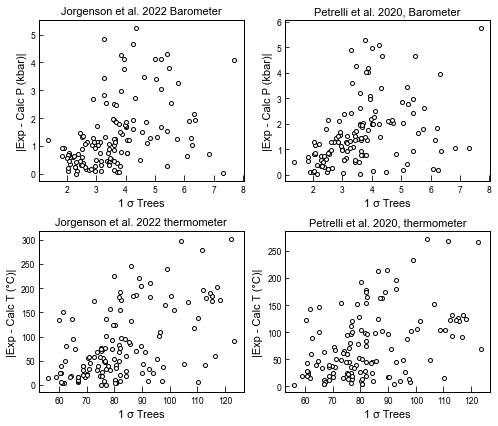

In [20]:

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (7,6)) # adjust dimensions 

CalcJorg_P=pt.calculate_cpx_only_press(cpx_comps=Cpx_Mask_Jorg, 
                                         equationP="P_Jorgenson2022_Cpx_only"
                                         )
CalcPet_P=pt.calculate_cpx_only_press(cpx_comps=Cpx_Mask_Jorg, 
                                         equationP="P_Petrelli2020_Cpx_only"
                                         )
CalcJorg_T=pt.calculate_cpx_only_temp(cpx_comps=Cpx_Mask_Jorg, 
                                         equationT="T_Jorgenson2022_Cpx_only"
                                         )
CalcPet_T=pt.calculate_cpx_only_temp(cpx_comps=Cpx_Mask_Jorg, 
                                         equationT="T_Petrelli2020_Cpx_only"
                                         )
CalcJorg_P.head()
ax0.set_title('Jorgenson et al. 2022 Barometer')
ax0.plot(
         CalcJorg_P['Std_Trees'],
    np.abs(x_P_kbar_Mask_Jorg-CalcJorg_P.P_kbar_calc),'ok', mfc='white', ms=4)


ax1.set_title('Petrelli et al. 2020, Barometer')
ax1.plot(
         CalcJorg_P['Std_Trees'],
    np.abs(x_P_kbar_Mask_Jorg-CalcPet_P.P_kbar_calc),'ok', mfc='white', ms=4)
ax0.set_xlabel('1 σ Trees')
ax0.set_ylabel('|Exp - Calc P (kbar)|')
ax1.set_xlabel('1 σ Trees')
ax1.set_ylabel('|Exp - Calc P (kbar)|')
ax2.set_title('Jorgenson et al. 2022 thermometer')
ax2.plot(
         CalcJorg_T['Std_Trees'],
    np.abs(x_T_Mask_Jorg-CalcJorg_T.T_K_calc),'ok', mfc='white', ms=4)


ax3.set_title('Petrelli et al. 2020, thermometer')
ax3.plot(
         CalcJorg_T['Std_Trees'],
    np.abs(x_T_Mask_Jorg-CalcPet_T.T_K_calc),'ok', mfc='white', ms=4)

ax2.set_xlabel('1 σ Trees')
ax2.set_ylabel('|Exp - Calc T (°C)|')
ax3.set_xlabel('1 σ Trees')
ax3.set_ylabel('|Exp - Calc T (°C)|')
fig.tight_layout()
fig.savefig('Tree sigma vs. T and P.png', dpi=300)

## What about if do as a percentage?

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


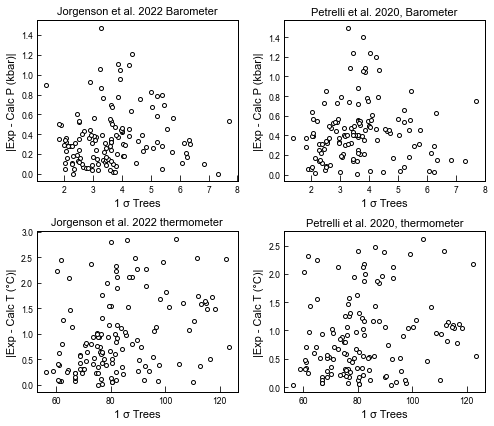

In [19]:

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (7,6)) # adjust dimensions 

CalcJorg_P=pt.calculate_cpx_only_press(cpx_comps=Cpx_Mask_Jorg, 
                                         equationP="P_Jorgenson2022_Cpx_only"
                                         )
CalcPet_P=pt.calculate_cpx_only_press(cpx_comps=Cpx_Mask_Jorg, 
                                         equationP="P_Petrelli2020_Cpx_only"
                                         )
CalcJorg_T=pt.calculate_cpx_only_temp(cpx_comps=Cpx_Mask_Jorg, 
                                         equationT="T_Jorgenson2022_Cpx_only"
                                         )
CalcPet_T=pt.calculate_cpx_only_temp(cpx_comps=Cpx_Mask_Jorg, 
                                         equationT="T_Petrelli2020_Cpx_only"
                                         )
CalcJorg_P.head()
ax0.set_title('Jorgenson et al. 2022 Barometer')
ax0.plot(
         CalcJorg_P['Std_Trees'],
    np.abs(x_P_kbar_Mask_Jorg-CalcJorg_P.P_kbar_calc)/CalcJorg_P['Std_Trees'],'ok', mfc='white', ms=4)


ax1.set_title('Petrelli et al. 2020, Barometer')
ax1.plot(
         CalcJorg_P['Std_Trees'],
    np.abs(x_P_kbar_Mask_Jorg-CalcPet_P.P_kbar_calc)/CalcJorg_P['Std_Trees'],'ok', mfc='white', ms=4)
ax0.set_xlabel('1 σ Trees')
ax0.set_ylabel('|Exp - Calc P (kbar)|')
ax1.set_xlabel('1 σ Trees')
ax1.set_ylabel('|Exp - Calc P (kbar)|')
ax2.set_title('Jorgenson et al. 2022 thermometer')
ax2.plot(
         CalcJorg_T['Std_Trees'],
    np.abs(x_T_Mask_Jorg-CalcJorg_T.T_K_calc)/ CalcJorg_T['Std_Trees'],'ok', mfc='white', ms=4)


ax3.set_title('Petrelli et al. 2020, thermometer')
ax3.plot(
         CalcJorg_T['Std_Trees'],
    np.abs(x_T_Mask_Jorg-CalcPet_T.T_K_calc)/CalcJorg_T['Std_Trees'],'ok', mfc='white', ms=4)

ax2.set_xlabel('1 σ Trees')
ax2.set_ylabel('|Exp - Calc T (°C)|')
ax3.set_xlabel('1 σ Trees')
ax3.set_ylabel('|Exp - Calc T (°C)|')
fig.tight_layout()
fig.savefig('Tree sigma vs. T and P.png', dpi=300)

# plt.plot(x_P_kbar_Mask_Jorg,  CalcJorg_P.Median_Trees, 'ok')

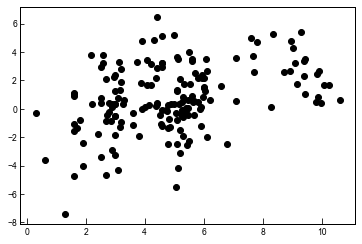

In [51]:
plt.plot(cpx_comps_Mask_Wang['H2O_Liq'], cpx_comps_Mask_Wang['Disc_P'], 'ok')

## What does discrepency of Wang thermometer correalte with 

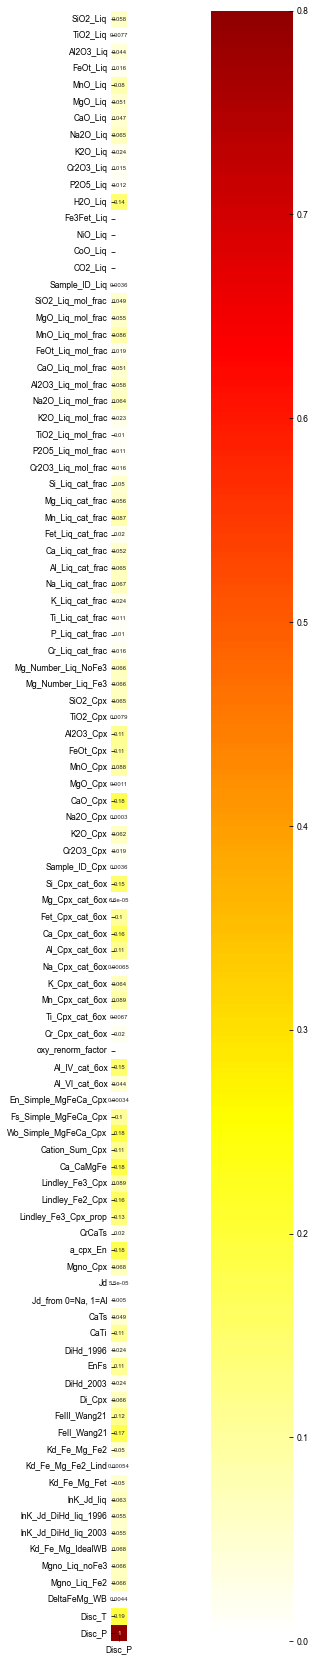

In [48]:
import seaborn as sns

import seaborn as sns
cpx_comps_Mask_Wang['Disc_T']=x_T_Mask_Wang-CalcWang.T_K_calc
cpx_comps_Mask_Wang['Disc_P']=x_P_kbar_Mask_Wang-CalcWang.P_kbar_calc

corrmat = cpx_comps_Mask_Wang.corr()
f, ax = plt.subplots(figsize=(30, 30))
x1=corrmat[['Disc_P']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=0, center= 0.5, cmap= 'hot_r', 
            annot=True, annot_kws={"size":6});

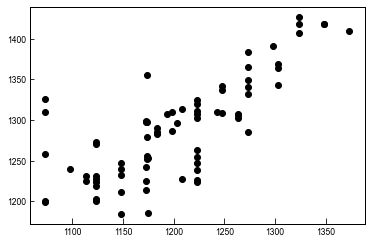

In [83]:

plt.plot(x_T_Mask.loc[LowSiO2], Calc['T_Wang21_eq2'].loc[LowSiO2], 'ok')

## Discrepency with H$_2$O content


#### fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (7,6)) # adjust dimensions 
################# Jorg
ax0.set_title('Jorgenson et al. 2022')
ax0.plot(cpx_Glass_Mask_Jorg['H2O_Liq'],
    x_T_Mask_Jorg-CalcJorg.T_K_calc,
             'ok', mfc='cyan', ms=4)
Jorg_Stats=pt.calculate_R2(cpx_Glass_Mask_Jorg['H2O_Liq'],
    x_T_Mask_Jorg-CalcJorg.T_K_calc, xy=True, df=True)
ax0.plot(Jorg_Stats['x_pred'], Jorg_Stats['y_pred'], '-r')
ax0.annotate("R$^{2}$ = "+str(Jorg_Stats['R2']),
                           xy=(0.2, 0.15), xycoords="axes fraction", fontsize=10)
ax0.annotate("Grad = "+str(np.round(Jorg_Stats['Grad'][0], 2)),
                           xy=(0.2, 0.1), xycoords="axes fraction", fontsize=10)
ax0.set_ylabel('Exp T - Calc T')
ax2.set_xlabel('H$_2$O Liq (wt%)')

# Put 32a 32 d###########################################3333
ax1.set_title('P2008 Eq32d-Eq32b')
ax1.plot(cpx_Glass_Mask['H2O_Liq'],
    x_T_Mask-Calc['P_Put_Teq32d_Peq32b'],
             'ok', mfc='cyan', ms=4)
P32_Stats=pt.calculate_R2(cpx_Glass_Mask['H2O_Liq'], x_T_Mask-Calc['P_Put_Teq32d_Peq32b'], xy=True, df=True)
ax1.plot(P32_Stats['x_pred'], P32_Stats['y_pred'], '-r')
ax1.annotate("R$^{2}$ = "+str(P32_Stats['R2']),
                           xy=(0.05, 0.15), xycoords="axes fraction", fontsize=10)
ax1.annotate("Grad = "+str(np.round(P32_Stats['Grad'][0], 2)),
                           xy=(0.05, 0.1), xycoords="axes fraction", fontsize=10)

######### Eq 32a
ax2.set_title('P2008 Eq32d-Eq32a')
ax2.plot(cpx_Glass_Mask['H2O_Liq'],
    x_T_Mask-Calc['P_Put_Teq32d_Peq32a'],
             'ok', mfc='cyan', ms=4)
P32_Stats=pt.calculate_R2(cpx_Glass_Mask['H2O_Liq'], x_T_Mask-Calc['P_Put_Teq32d_Peq32a'], xy=True, df=True)
ax2.plot(P32_Stats['x_pred'], P32_Stats['y_pred'], '-r')
ax2.annotate("R$^{2}$ = "+str(P32_Stats['R2']),
                           xy=(0.05, 0.15), xycoords="axes fraction", fontsize=10)
ax2.annotate("Grad = "+str(np.round(P32_Stats['Grad'][0], 2)),
                           xy=(0.05, 0.1), xycoords="axes fraction", fontsize=10)


## Wang #################3

ax3.set_title('Wang et al. (2021)')
ax3.plot(cpx_Glass_Mask['H2O_Liq'],
    x_T_Mask-Calc['T_Wang21_eq2'],
             'ok', mfc='cyan')
Wang_Stats=pt.calculate_R2(cpx_Glass_Mask['H2O_Liq'], x_T_Mask-Calc['T_Wang21_eq2'], xy=True, df=True)
ax3.plot(Wang_Stats['x_pred'], Wang_Stats['y_pred'], '-r')
ax3.annotate("R$^{2}$ = "+str(Wang_Stats['R2']),
                           xy=(0.4, 0.15), xycoords="axes fraction", fontsize=10)
ax3.annotate("Grad = "+str(np.round(Wang_Stats['Grad'][0], 2)),
                           xy=(0.4, 0.1), xycoords="axes fraction", fontsize=10)




ax0.set_ylabel('Exp T - Calc T')
ax2.set_ylabel('Exp T - Calc T')
ax2.set_xlabel('H$_2$O Liq (wt%)')
ax3.set_xlabel('H$_2$O Liq (wt%)')
fig.savefig('Supplement_Cpx_only_H2O_corr.png', dpi=300)

{'R2': '0.48',
 'RMSE': '114.67',
 'RMSE_num': 114.67,
 'P_val': '0.000',
 'Median': '-63.07',
 'Mean': '-84.35',
 'Int': array([47.88665267]),
 'Grad': array([-27.72802372])}

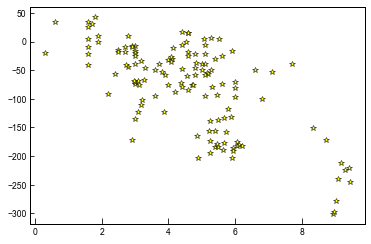

In [25]:
plt.plot(cpx_Glass_Mask_Jorg['H2O_Liq'],
    x_T_Mask_Jorg-CalcJorg.T_K_calc,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
pt.calculate_R2(cpx_Glass_Mask_Jorg['H2O_Liq'],
    x_T_Mask_Jorg-CalcJorg.T_K_calc, xy=False)

{'R2': '0.47',
 'RMSE': '211.16',
 'RMSE_num': 211.16,
 'P_val': '0.000',
 'Median': '-180.00',
 'Mean': '-188.43',
 'Int': array([-66.47384219]),
 'Grad': array([-26.02626585])}

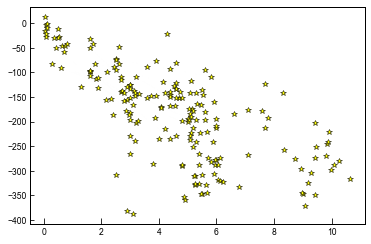

In [21]:
plt.plot(cpx_Glass_Mask['H2O_Liq'],
    x_T_Mask-Calc['T_Put_Teq32d_Peq32b'],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
pt.calculate_R2(cpx_Glass_Mask['H2O_Liq'],
    x_T_Mask-Calc['T_Put_Teq32d_Peq32b'], xy=False)

{'R2': '0.35',
 'RMSE': '196.28',
 'RMSE_num': 196.28,
 'P_val': '0.000',
 'Median': '-167.12',
 'Mean': '-177.33',
 'Int': array([-84.20654245]),
 'Grad': array([-19.73174587])}

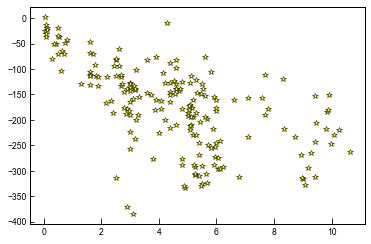

In [22]:
plt.plot(cpx_Glass_Mask['H2O_Liq'],
    x_T_Mask-Calc['T_Put_Teq32d_Peq32a'],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
pt.calculate_R2(cpx_Glass_Mask['H2O_Liq'],
    x_T_Mask-Calc['T_Put_Teq32d_Peq32a'], xy=False)

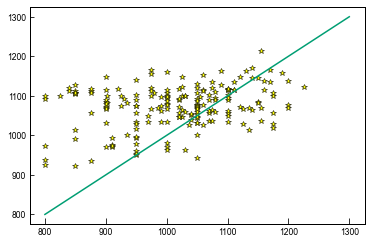

In [13]:
plt.plot(x_T_Mask-273.15,
             (Calc['T_Put_Teq32d_Peq32b']+Calc['T_Put_Teq32d_subsol_Peq32b'])/2-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
plt.plot([800, 1300], [800, 1300])

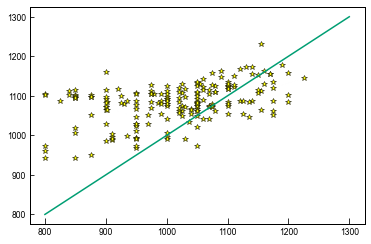

In [14]:
plt.plot(x_T_Mask-273.15,
             (Calc['T_Put_Teq32d_Peq32a']+Calc['T_Put_Teq32d_subsol_Peq32a'])/2-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
plt.plot([800, 1300], [800, 1300])

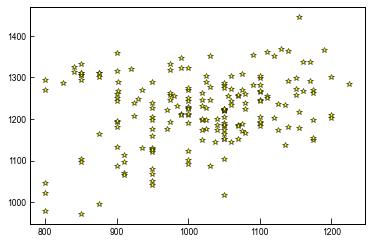

In [12]:
plt.plot(x_T_Mask-273.15,
             Calc['T_Put_Teq32d_subsol_Peq32b'],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )


## Pressures

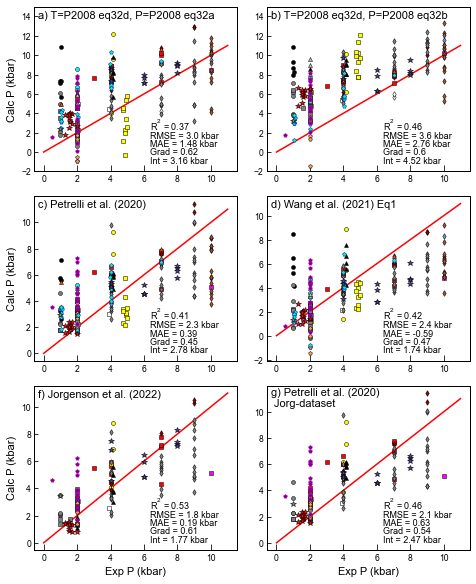

In [55]:
fig, ((ax0, ax1), (ax4, ax3), (ax2, ax5)) = plt.subplots(3,2, figsize = (7.8,10)) # adjust dimensions of figure here
lin_min=0
lin_max=11

face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'yellow', 'orange')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '*', '*')


nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6)

ax0.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax3.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax4.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax5.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  
    
## 32-32a
    ax0.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_Put_Teq32d_Peq32a'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

## 32-32b
    
    ax1.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_Put_Teq32d_Peq32b'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

 # Jorgenson  
    ax2.plot(x_P_kbar_Mask_Jorg.loc[cpx_Glass_Mask_Jorg['Citation_x']==ref],
             CalcJorg['P_kbar_calc'].loc[cpx_Glass_Mask_Jorg['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    # Wang
    ax3.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_Wang21_eq1'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    
        
        
        #Petrelli
    ax4.plot(x_P_kbar_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['P_Petrelli20'].loc[cpx_Glass_Mask['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    ax5.plot(x_P_kbar_Mask_Jorg.loc[cpx_Glass_Mask_Jorg['Citation_x']==ref],
             CalcPet['P_kbar_calc'].loc[cpx_Glass_Mask_Jorg['Citation_x']==ref],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

        
        
        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33
ax0.annotate("a) T=P2008 eq32d, P=P2008 eq32a", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax1.annotate("b) T=P2008 eq32d, P=P2008 eq32b", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax2.annotate("f) Jorgenson et al. (2022)", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax3.annotate("d) Wang et al. (2021) Eq1", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)
ax4.annotate("c) Petrelli et al. (2020)", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)
ax5.annotate("g) Petrelli et al. (2020) \n Jorg-dataset", xy=(0.02, 0.87),
             xycoords="axes fraction",  fontsize=11)

# Statistics - #############################################3

Press_Stats_PN17_Teq33=Press_Stats_32d_32a
ax0.annotate("R$^{2}$ = "+str(Press_Stats_PN17_Teq33['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax0.annotate("RMSE = "+str(Press_Stats_PN17_Teq33['RMSE_num']) +" kbar",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax0.annotate("MAE = "+str(Press_Stats_PN17_Teq33['Mean Error']) +" kbar",
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
ax0.annotate("Grad = "+str(Press_Stats_PN17_Teq33['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax0.annotate("Int = "+str(Press_Stats_PN17_Teq33['Int']) +" kbar",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)

Press_Stats_30_Teq33=Press_Stats_32d_32b
ax1.annotate("R$^{2}$ = "+str(Press_Stats_30_Teq33['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax1.annotate("RMSE = "+str(Press_Stats_30_Teq33['RMSE_num']) +" kbar",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax1.annotate("MAE = "+str(Press_Stats_30_Teq33['Mean Error']) +" kbar",
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
ax1.annotate("Grad = "+str(Press_Stats_30_Teq33['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax1.annotate("Int = "+str(Press_Stats_30_Teq33['Int']) +" kbar",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)




Press_Stats_Jorg=Press_Stats_Jorg
ax2.annotate("R$^{2}$ = "+str(Press_Stats_Jorg['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax2.annotate("RMSE = "+str(Press_Stats_Jorg['RMSE_num']) +" kbar",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax2.annotate("MAE = "+str(Press_Stats_Jorg['Mean Error']) +" kbar",
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
ax2.annotate("Grad = "+str(Press_Stats_Jorg['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax2.annotate("Int = "+str(Press_Stats_Jorg['Int']) +" kbar",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)


Press_Stats_32c_Teq33=Press_Stats_Wang
ax3.annotate("R$^{2}$ = "+str(Press_Stats_32c_Teq33['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax3.annotate("RMSE = "+str(Press_Stats_32c_Teq33['RMSE_num']) +" kbar",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax3.annotate("MAE = "+str(Press_Stats_32c_Teq33['Mean Error']),
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)

ax3.annotate("Grad = "+str(Press_Stats_32c_Teq33['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax3.annotate("Int = "+str(Press_Stats_32c_Teq33['Int']) +" kbar",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)

stats4=Press_Stats_Petrelli
ax4.annotate("R$^{2}$ = "+str(stats4['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax4.annotate("RMSE = "+str(stats4['RMSE_num']) +" kbar",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax4.annotate("MAE = "+str(stats4['Mean Error']),
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)

ax4.annotate("Grad = "+str(stats4['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax4.annotate("Int = "+str(stats4['Int']) +" kbar",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)

stats5=Press_Stats_Petrelli2
ax5.annotate("R$^{2}$ = "+str(stats5['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax5.annotate("RMSE = "+str(stats5['RMSE_num']) +" kbar",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax5.annotate("MAE = "+str(stats5['Mean Error']),
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)

ax5.annotate("Grad = "+str(stats5['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax5.annotate("Int = "+str(stats5['Int']) +" kbar",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)




plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
ax0.set_ylabel('Calc P (kbar)')
ax4.set_ylabel('Calc P (kbar)')
ax2.set_ylabel('Calc P (kbar)')
ax2.set_xlabel('Exp P (kbar)')
ax5.set_xlabel('Exp P (kbar)')
ax0.set_ylim([-2, 15])
ax1.set_ylim([-2, 15])
# ax1.set_ylim([850, 1350])
fig.savefig('Cpx_only_Press_Comparison_lABELLED.png', dpi=300)

(array([ 1., 22.,  9., 55.,  0.,  1.,  0., 38.,  3.,  7.,  0.,  4.,  0.,
        18.,  0.,  4.,  0., 14.,  0., 18.]),
 array([ 0.5  ,  0.975,  1.45 ,  1.925,  2.4  ,  2.875,  3.35 ,  3.825,
         4.3  ,  4.775,  5.25 ,  5.725,  6.2  ,  6.675,  7.15 ,  7.625,
         8.1  ,  8.575,  9.05 ,  9.525, 10.   ]),
 <BarContainer object of 20 artists>)

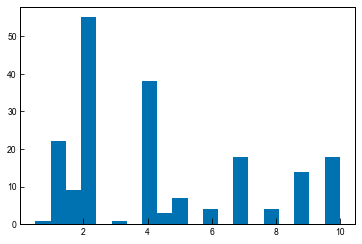

In [57]:
plt.hist(x_P_kbar_Mask, bins=20)

## Supplementary 
- Show eq34 - Neave and Putirka


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


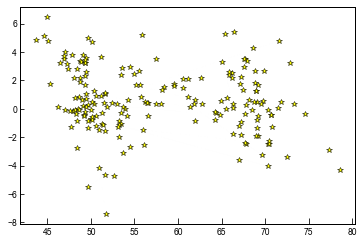

In [58]:
cpx_comps=pt.calculate_clinopyroxene_liquid_components(liq_comps=Liq_Mask,
                                                       cpx_comps=Cpx_Mask)
plt.plot(cpx_comps['SiO2_Liq'],
             x_P_kbar_Mask-
             Calc['P_Wang21_eq1'],
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )


(array([ 3.,  1.,  0.,  4., 10., 25., 46., 58., 41.,  6.]),
 array([0.27857435, 0.30011616, 0.32165797, 0.34319978, 0.36474159,
        0.3862834 , 0.40782521, 0.42936702, 0.45090883, 0.47245064,
        0.49399246]),
 <BarContainer object of 10 artists>)

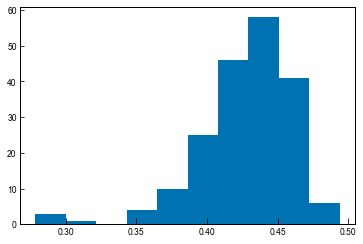

In [40]:
plt.hist(cpx_comps['Ca_CaMgFe'])

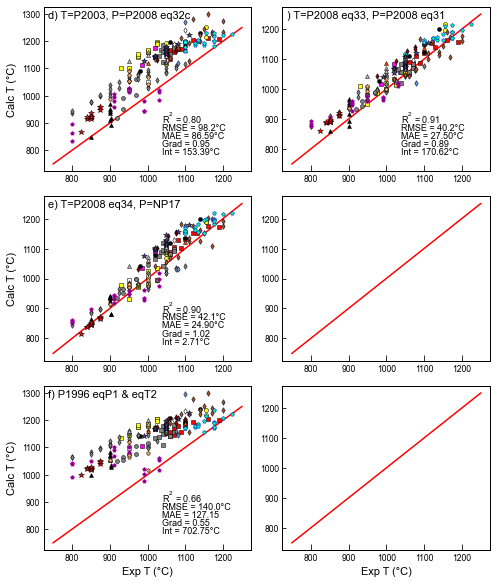

In [38]:

fig, ((ax0, ax1), (ax2, ax4), (ax3, ax5)) = plt.subplots(3,2, figsize = (8,10)) # adjust dimensions of figure here
lin_min=750
lin_max=1250

face_colors = ('red', 'yellow', 'magenta', 'white','grey', 
          'cyan', 'black', 'red', 'yellow', 'grey',
          'white','darkred', 'grey', 'cornflowerblue',  'sienna', 
            'orangered', 'aquamarine', 'yellow', 'black','silver', 
          'red', 'sandybrown', 'springgreen', 'purple', 'pink',
              'grey', 'darkslateblue', 'red', 'yellow', 'orange')


edge_colors=('k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'k', 'k', 'k',
             'k', 'k', 'b', 'm', 'm', 
             'k', 'k', 'k', 'k', 'k')
            
ncolor = 0
markers = ('s', 's', 's', 's', 's',
           'o', 'o', 'o', 'o', 'o',
           'd', 'd', 'd', 'd', 'd',
           '^','^','^','^', '^',
           'p', 'p', 'p', 'p', 'p',
          '*', '*', '*', '*', '*')


nmarkers = 0


ms=(4, 4, 4, 4, 4,
    4, 4, 4,4 ,4,
    4, 4, 4, 4, 4,
    4, 4, 4, 4, 4,  
    4, 4, 4, 4, 4,
   6, 6, 6, 6, 6)

ax0.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax1.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax2.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax3.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax4.plot([lin_min, lin_max], [lin_min, lin_max], '-r')
ax5.plot([lin_min, lin_max], [lin_min, lin_max], '-r')



Unique_ref=Cpx_Glass['Citation_x'].loc[Press_new].unique()
for ref in Unique_ref:  
## Neave and putirka, eq 33
    ax0.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put2008_eq32c, T_Put2003)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

## Eq30, eq 33
    
    ax1.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put2008_eq31, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

 # Eq 34 - NP17   
    ax2.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

    # Eq32c and eq33
    ax3.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             Calc['T_K: (P_Put1996_eqP1, T_Put1996_eqT2)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )
        

        
    ncolor+=1
    nmarkers+=1   

    
### ANNOTATIONS ##########################################33
ax0.annotate("d) T=P2003, P=P2008 eq32c", xy=(0.02, 0.93), xycoords="axes fraction",
             fontsize=11)
ax1.annotate(") T=P2008 eq33, P=P2008 eq31", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax2.annotate("e) T=P2008 eq34, P=NP17", xy=(0.02, 0.93), 
             xycoords="axes fraction",  fontsize=11)
ax3.annotate("f) P1996 eqP1 & eqT2", xy=(0.02, 0.93),
             xycoords="axes fraction",  fontsize=11)

# Statistics - #############################################3


ax0.annotate("R$^{2}$ = "+str(Temp_Stats_32c_2003['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax0.annotate("RMSE = "+str(Temp_Stats_32c_2003['RMSE_num']) +"°C",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax0.annotate("MAE = "+str(Temp_Stats_32c_2003['Mean Error']) +"°C",
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
ax0.annotate("Grad = "+str(Temp_Stats_32c_2003['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax0.annotate("Int = "+str(Temp_Stats_32c_2003['Int']) +"°C",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)


ax1.annotate("R$^{2}$ = "+str(Temp_Stats_31_Teq33['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax1.annotate("RMSE = "+str(Temp_Stats_31_Teq33['RMSE_num']) +"°C",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax1.annotate("MAE = "+str(Temp_Stats_31_Teq33['Mean Error']) +"°C",
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
ax1.annotate("Grad = "+str(Temp_Stats_31_Teq33['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax1.annotate("Int = "+str(Temp_Stats_31_Teq33['Int']) +"°C",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)




ax2.annotate("R$^{2}$ = "+str(Temp_Stats_34_PN17['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax2.annotate("RMSE = "+str(Temp_Stats_34_PN17['RMSE_num']) +"°C",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax2.annotate("MAE = "+str(Temp_Stats_34_PN17['Mean Error']) +"°C",
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)
ax2.annotate("Grad = "+str(Temp_Stats_34_PN17['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax2.annotate("Int = "+str(Temp_Stats_34_PN17['Int']) +"°C",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)

ax3.annotate("R$^{2}$ = "+str(Temp_Stats_P1996_P1_T2['R$^{2}$']),
                           xy=(0.63, 0.21), xycoords="axes fraction", fontsize=8)
ax3.annotate("RMSE = "+str(Temp_Stats_P1996_P1_T2['RMSE_num']) +"°C",
                           xy=(0.63, 0.16), xycoords="axes fraction", fontsize=8)
ax3.annotate("MAE = "+str(Temp_Stats_P1996_P1_T2['Mean Error']),
                           xy=(0.63, 0.11), xycoords="axes fraction", fontsize=8)

ax3.annotate("Grad = "+str(Temp_Stats_P1996_P1_T2['Grad']),
                           xy=(0.63, 0.06), xycoords="axes fraction", fontsize=8)
ax3.annotate("Int = "+str(Temp_Stats_P1996_P1_T2['Int']) +"°C",
                           xy=(0.63, 0.05), xycoords="axes fraction", fontsize=8)





plt.subplots_adjust(
                    wspace=0.15, 
                    hspace=0.15)

# Eq 33 for T, Neave and Putirka, 2017 for pressure. 
#ax0.legend()
ax0.set_ylabel('Calc T (°C)')
ax2.set_ylabel('Calc T (°C)')
ax3.set_ylabel('Calc T (°C)')
ax3.set_xlabel('Exp T (°C)')
ax5.set_xlabel('Exp T (°C)')
fig.savefig('Cpx_Liq_Temp_Comparison_Supplement.png', dpi=300)

In [12]:
Unique_ref=cpx_Glass_Mask['Citation_x'].unique()
Unique_ref

array(['Hamada2008_notinLEPR', 'Kraw2013_notinLEPR',
       'Firth2019_notinLEPR', 'Erdmann2016_notinLEPR',
       'Parmon2011_notinLEPR', 'Berndt2005_notinLEPR',
       'Feig2010_notinLEPR', 'Pichavent2007_notinLEPR',
       'Mandler2013_notinLEPR', 'Nandekar2014_notinLEPR',
       'Blatter2013_notinLEPR', 'Blatter2017_notinLEPR',
       'Melekhova2015_notinLEPR', 'Ulmer2018_notinLEPR',
       'Almeev2013_notinLEPR', 'Cadoux2014_notinLEPR',
       'Parat2014_notinLEPR', 'Koepke2018_notinLEPR',
       'Husen2016_notinLEPR', 'Erdman_Koepke2016_notinLEPR',
       'Neave2019_notinLEPR', 'Waters2020_notinLEPR',
       'Marxer2022_notinLEPR', 'Nakatani2022_notinLEPR'], dtype=object)

In [13]:
Cpx_Glass['Citation_x'].loc[Press_new].unique()

array(['Hamada2008_notinLEPR', 'Kraw2013_notinLEPR',
       'Firth2019_notinLEPR', 'Erdmann2016_notinLEPR',
       'Parmon2011_notinLEPR', 'Berndt2005_notinLEPR',
       'Feig2010_notinLEPR', 'Costa2004_notinLEPR',
       'Pichavent2007_notinLEPR', 'Mandler2013_notinLEPR',
       'Nandekar2014_notinLEPR', 'Blatter2013_notinLEPR',
       'Blatter2017_notinLEPR', 'Melekhova2015_notinLEPR',
       'Ulmer2018_notinLEPR', 'Almeev2013_notinLEPR',
       'Bogaerts2006_notinLEPR', 'Andujar2015_notinLEPR',
       'Cadoux2014_notinLEPR', 'Parat2014_notinLEPR',
       'Sisson2005_notinLEPR', 'Koepke2018_notinLEPR',
       'Husen2016_notinLEPR', 'Erdman_Koepke2016_notinLEPR',
       'Neave2019_notinLEPR', 'Waters2020_notinLEPR',
       'Marxer2022_notinLEPR', 'Nakatani2022_notinLEPR'], dtype=object)

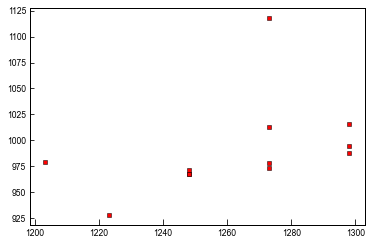

In [23]:
ref=Unique_ref[1]

plt.plot(x_T_Mask.loc[cpx_Glass_Mask['Citation_x']==ref],
             Calc['T_K: (P_Neave17, T_Put2008_eq33)'].loc[cpx_Glass_Mask['Citation_x']==ref]-273.15,
             marker=markers[nmarkers],  ms=ms[ncolor], mew=0.5,linewidth=0.0001,
        mfc=face_colors[ncolor],  mec=edge_colors[ncolor], linestyle=None ,  label=ref )

In [ ]:
Temp_Stats_PN17_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Neave17, T_Put2008_eq33)']) 
Temp_Stats_30_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq30, T_Put2008_eq33)']) 
Temp_Stats_31_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq31, T_Put2008_eq33)']) 
Temp_Stats_32c_Teq33=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put2008_eq32c, T_Put2008_eq33)']) 
Temp_Stats_P2003=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P2003 P&T)']) 
Temp_Stats_Pet=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (Petrelli, 2020)']) 
Temp_Stats_P1996_P1_T2=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Put1996_eqP1, T_Put1996_eqT2)']) 
Temp_Stats_34_PN17=pt.calculate_R2_Tukey(x_T_Mask, Calc['T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)']) 

## Does Jorg care about water?

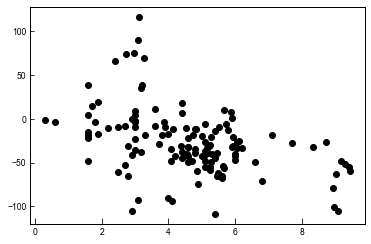

In [26]:
plt.plot(cpx_Glass_Mask_Jorg['H2O_Liq'], 
         x_T_Mask_Jorg-CalcJorg.T_K_calc, 
         'ok')

## Discrepency plots - Neave and Putirka, eq 33
- Only correlation duration, and only 3 datapoints. 

In [ ]:
import seaborn as sns

import seaborn as sns
cpx_Glass_Mask['Disc']=x_T_Mask-Calc['T_K: (P_Neave17, T_Put2008_eq33)']
corrmat = cpx_Glass_Mask.corr()
f, ax = plt.subplots(figsize=(3, 15))
x1=corrmat[['Disc']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=0, center= 0.5, cmap= 'hot_r', 
            annot=True, annot_kws={"size":8});

## Discrepency plot - NP2017, eq 34

In [ ]:
import seaborn as sns

import seaborn as sns
cpx_Glass_Mask['Disc']=x_T_Mask-Calc['T_K: (P_Neave17, T_Put2008_eq34_cpx_sat)']
corrmat = cpx_Glass_Mask.corr()
f, ax = plt.subplots(figsize=(15, 15))
x1=corrmat[['Disc']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=0, center= 0.5, cmap= 'hot_r', 
            annot=True, annot_kws={"size":8});

In [ ]:
plt.plot(cpx_Glass_Mask['H2O_Liq'], cpx_Glass_Mask['Disc'], 'ok')

## Petrelli et al. 2020 discrepency

In [ ]:
import seaborn as sns

import seaborn as sns
cpx_Glass_Mask['Disc']=x_T_Mask-Calc['T_K: (Petrelli, 2020)']
corrmat = cpx_Glass_Mask.corr()
f, ax = plt.subplots(figsize=(3, 15))
x1=corrmat[['Disc']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=0, center= 0.5, cmap= 'hot_r', 
            annot=True, annot_kws={"size":8});

In [ ]:
plt.plot(cpx_Glass_Mask['T_K_x'], cpx_Glass_Mask['Disc'], 'ok')

## Putirka (2003)

In [ ]:
import seaborn as sns

import seaborn as sns
cpx_Glass_Mask['Disc']=x_T_Mask-Calc['T_K: (P2003 P&T)']
corrmat = cpx_Glass_Mask.corr()
f, ax = plt.subplots(figsize=(3, 15))
x1=corrmat[['Disc']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=0, center= 0.5, cmap= 'hot_r', 
            annot=True, annot_kws={"size":8});

In [ ]:
plt.plot(cpx_Glass_Mask['H2O_Liq'], cpx_Glass_Mask['Disc'], 'ok')

## Putirka (1996) eqT2 and P1

In [ ]:
import seaborn as sns

import seaborn as sns
cpx_Glass_Mask['Disc']=x_T_Mask-Calc['T_K: (P_Put1996_eqP1, T_Put1996_eqT2)']
corrmat = cpx_Glass_Mask.corr()
f, ax = plt.subplots(figsize=(3, 15))
x1=corrmat[['Disc']]
sns.heatmap(x1**2, vmax=.8, square=True, vmin=0, center= 0.5, cmap= 'hot_r', 
            annot=True, annot_kws={"size":8});

In [ ]:
plt.plot(cpx_Glass_Mask['H2O_Liq'], cpx_Glass_Mask['Disc'], 'ok')

In [ ]:
plt.plot(cpx_Glass_Mask['T_K_x'], cpx_Glass_Mask['Disc'], 'ok')

In [ ]:
plt.plot(cpx_Glass_Mask['FeOt_Liq'], cpx_Glass_Mask['Disc'], 'ok')